# Passenger Load Prediction Project

### 1 EDA & Data Cleaning

##### This notebook performs the exploratory data analysis (EDA) and data cleaning for the flight dataset. The objective is to understand the structure and key characteristics of the data, identify outliers and prepare a clean dataset for modeling.
##### The analysis includes descriptive statistics, visual exploration and systematic filtering to ensure that the resulting dataset provides a reliable foundation for the subsequent predictive modeling.

Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read the data. You can select and download similar data here: https://www.transtats.bts.gov/DL_SelectFields.aspx?gnoyr_VQ=GEE&QO_fu146_anzr=Nv4%20Pn44vr45

In [2]:
data = pd.read_csv('../data/flight_data.csv')

Get data info

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440751 entries, 0 to 440750
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   DEPARTURES_SCHEDULED  440751 non-null  float64
 1   DEPARTURES_PERFORMED  440751 non-null  float64
 2   PAYLOAD               440751 non-null  float64
 3   SEATS                 440751 non-null  float64
 4   PASSENGERS            440751 non-null  float64
 5   FREIGHT               440751 non-null  float64
 6   MAIL                  440751 non-null  float64
 7   DISTANCE              440751 non-null  float64
 8   RAMP_TO_RAMP          440751 non-null  float64
 9   AIR_TIME              440751 non-null  float64
 10  UNIQUE_CARRIER        440751 non-null  object 
 11  UNIQUE_CARRIER_NAME   440751 non-null  object 
 12  CARRIER_GROUP         440751 non-null  int64  
 13  ORIGIN_AIRPORT_ID     440751 non-null  int64  
 14  ORIGIN                440751 non-null  object 
 15  

In [4]:
data.head()

,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,PAYLOAD,SEATS,PASSENGERS,FREIGHT,MAIL,DISTANCE,RAMP_TO_RAMP,AIR_TIME,...,ORIGIN_CITY_NAME,ORIGIN_STATE_FIPS,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_FIPS,AIRCRAFT_TYPE,AIRCRAFT_CONFIG,YEAR,MONTH
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,...,"Chicago, IL",17,13232,MDW,"Chicago, IL",17,622,1,2024,10
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,"Block Island, RI",44,15855,WST,"Westerly, RI",44,79,1,2024,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,"Block Island, RI",44,15855,WST,"Westerly, RI",44,79,1,2024,7
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,"Block Island, RI",44,15855,WST,"Westerly, RI",44,79,1,2024,8
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,"Block Island, RI",44,15855,WST,"Westerly, RI",44,79,1,2024,12


In [5]:
data.tail()

,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,PAYLOAD,SEATS,PASSENGERS,FREIGHT,MAIL,DISTANCE,RAMP_TO_RAMP,AIR_TIME,...,ORIGIN_CITY_NAME,ORIGIN_STATE_FIPS,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_FIPS,AIRCRAFT_TYPE,AIRCRAFT_CONFIG,YEAR,MONTH
440746,989.0,987.0,2902800.0,8892.0,5602.0,8038.0,0.0,59.0,38105.0,28285.0,...,"Anchorage, AK",2,11555,ENA,"Kenai, AK",2,416,1,2024,8
440747,995.0,994.0,2737200.0,8946.0,7247.0,10718.0,0.0,59.0,37921.0,27463.0,...,"Anchorage, AK",2,11555,ENA,"Kenai, AK",2,416,1,2024,7
440748,999.0,998.0,2748200.0,8991.0,6631.0,5663.0,0.0,59.0,39218.0,30137.0,...,"Kenai, AK",2,10299,ANC,"Anchorage, AK",2,416,1,2024,7
440749,1522.0,1522.0,1826400.0,8026.0,5084.0,10340.0,0.0,11.0,17768.0,13202.0,...,"Tinian, TT",75,14955,SPN,"Saipan, TT",75,79,1,2024,7
440750,1574.0,1574.0,1888800.0,8284.0,5104.0,29100.0,0.0,11.0,20390.0,15668.0,...,"Saipan, TT",75,15215,TIQ,"Tinian, TT",75,79,1,2024,7


In [6]:
data.isna().sum()

DEPARTURES_SCHEDULED    0
DEPARTURES_PERFORMED    0
PAYLOAD                 0
SEATS                   0
PASSENGERS              0
FREIGHT                 0
MAIL                    0
DISTANCE                0
RAMP_TO_RAMP            0
AIR_TIME                0
UNIQUE_CARRIER          0
UNIQUE_CARRIER_NAME     0
CARRIER_GROUP           0
ORIGIN_AIRPORT_ID       0
ORIGIN                  0
ORIGIN_CITY_NAME        0
ORIGIN_STATE_FIPS       0
DEST_AIRPORT_ID         0
DEST                    0
DEST_CITY_NAME          0
DEST_STATE_FIPS         0
AIRCRAFT_TYPE           0
AIRCRAFT_CONFIG         0
YEAR                    0
MONTH                   0
dtype: int64

Change column names to lowercase letters

In [7]:
data.columns = [x.lower() for x in data.columns.to_list()]
data.columns

Index(['departures_scheduled', 'departures_performed', 'payload', 'seats',
       'passengers', 'freight', 'mail', 'distance', 'ramp_to_ramp', 'air_time',
       'unique_carrier', 'unique_carrier_name', 'carrier_group',
       'origin_airport_id', 'origin', 'origin_city_name', 'origin_state_fips',
       'dest_airport_id', 'dest', 'dest_city_name', 'dest_state_fips',
       'aircraft_type', 'aircraft_config', 'year', 'month'],
      dtype='object')

Add column with average seats per flight, using departures_performed as departures_scheduled does not appear to contain reliable entries, but rather many null values

In [8]:
data["avg_passengers_per_flight"] = (
    (data["passengers"] / data["departures_performed"].replace(0, np.nan))
    .round(0)
    .astype("Int64")
)

Add column with average passengers per flight

In [9]:
data["avg_seats_per_flight"] = (
    (data["seats"] / data["departures_performed"].replace(0, np.nan))
    .round(0)
    .astype("Int64")
)

In [10]:
data.tail()

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest_airport_id,dest,dest_city_name,dest_state_fips,aircraft_type,aircraft_config,year,month,avg_passengers_per_flight,avg_seats_per_flight
440746,989.0,987.0,2902800.0,8892.0,5602.0,8038.0,0.0,59.0,38105.0,28285.0,...,11555,ENA,"Kenai, AK",2,416,1,2024,8,6,9
440747,995.0,994.0,2737200.0,8946.0,7247.0,10718.0,0.0,59.0,37921.0,27463.0,...,11555,ENA,"Kenai, AK",2,416,1,2024,7,7,9
440748,999.0,998.0,2748200.0,8991.0,6631.0,5663.0,0.0,59.0,39218.0,30137.0,...,10299,ANC,"Anchorage, AK",2,416,1,2024,7,7,9
440749,1522.0,1522.0,1826400.0,8026.0,5084.0,10340.0,0.0,11.0,17768.0,13202.0,...,14955,SPN,"Saipan, TT",75,79,1,2024,7,3,5
440750,1574.0,1574.0,1888800.0,8284.0,5104.0,29100.0,0.0,11.0,20390.0,15668.0,...,15215,TIQ,"Tinian, TT",75,79,1,2024,7,3,5


In [11]:
data.describe()

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,origin_airport_id,origin_state_fips,dest_airport_id,dest_state_fips,aircraft_type,aircraft_config,year,month,avg_passengers_per_flight,avg_seats_per_flight
count,440751.000000,440751.000000,4.407510e+05,440751.000000,440751.000000,4.407510e+05,4.407510e+05,440751.000000,440751.000000,440751.000000,...,440751.000000,440751.000000,440751.000000,440751.000000,440751.000000,440751.000000,440751.0,440751.000000,439891.0,439891.0
mean,19.479345,20.087244,7.366505e+05,2407.468793,1949.990149,6.354306e+04,2.638118e+03,768.300040,2631.662465,2136.808293,...,12764.039240,25.041030,12761.797929,25.102747,634.727724,1.142303,2024.0,6.575504,86.327208,114.726655
std,33.681686,33.100850,1.375799e+06,4547.112330,3812.564110,4.714950e+05,3.434086e+04,638.189156,4548.022006,3854.597995,...,1582.923385,17.786614,1579.855683,17.776401,170.938409,0.437672,0.0,3.432239,64.721131,75.667556
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,10001.000000,1.000000,10001.000000,1.000000,26.000000,1.000000,2024.0,1.000000,0.0,0.0
25%,1.000000,1.000000,4.480000e+04,81.000000,32.000000,0.000000e+00,0.000000e+00,288.000000,174.000000,139.000000,...,11292.000000,8.000000,11292.000000,8.000000,614.000000,1.000000,2024.0,4.000000,6.0,50.0
50%,7.000000,8.000000,2.380000e+05,572.000000,442.000000,0.000000e+00,0.000000e+00,630.000000,892.000000,699.000000,...,12889.000000,23.000000,12889.000000,23.000000,673.000000,1.000000,2024.0,7.000000,97.0,143.0
75%,26.000000,27.000000,9.114000e+05,3040.000000,2403.500000,1.120000e+03,0.000000e+00,1047.000000,3305.000000,2582.000000,...,14100.000000,41.000000,14100.000000,41.000000,699.000000,1.000000,2024.0,10.000000,142.0,176.0
max,1574.000000,1574.000000,4.953270e+07,83712.000000,72783.000000,4.129528e+07,3.108694e+06,7360.000000,103896.000000,94868.000000,...,17058.000000,78.000000,17058.000000,78.000000,889.000000,4.000000,2024.0,12.000000,489.0,509.0


In [12]:
data.nunique()

departures_scheduled            511
departures_performed            510
payload                      104338
seats                         13722
passengers                    19395
freight                       54338
mail                          14855
distance                       2589
ramp_to_ramp                  22149
air_time                      19542
unique_carrier                  200
unique_carrier_name             200
carrier_group                     4
origin_airport_id              1338
origin                         1338
origin_city_name               1199
origin_state_fips                53
dest_airport_id                1340
dest                           1340
dest_city_name                 1207
dest_state_fips                  53
aircraft_type                   157
aircraft_config                   4
year                              1
month                            12
avg_passengers_per_flight       372
avg_seats_per_flight            309
dtype: int64

Check flight with highest number of average seats

In [13]:
data.loc[data["avg_seats_per_flight"].idxmax()]

departures_scheduled                               0.0
departures_performed                               1.0
payload                                       138114.0
seats                                            509.0
passengers                                       239.0
freight                                        17153.0
mail                                               0.0
distance                                         187.0
ramp_to_ramp                                       0.0
air_time                                           0.0
unique_carrier                                      LH
unique_carrier_name          Lufthansa German Airlines
carrier_group                                        0
origin_airport_id                                12478
origin                                             JFK
origin_city_name                          New York, NY
origin_state_fips                                   36
dest_airport_id                                  10721
dest      

Check flight with highest number of average passengers

In [14]:
data.loc[data["avg_passengers_per_flight"].idxmax()]

departures_scheduled                               0.0
departures_performed                               1.0
payload                                       138114.0
seats                                            509.0
passengers                                       489.0
freight                                            0.0
mail                                               0.0
distance                                         413.0
ramp_to_ramp                                       0.0
air_time                                           0.0
unique_carrier                                      LH
unique_carrier_name          Lufthansa German Airlines
carrier_group                                        0
origin_airport_id                                12264
origin                                             IAD
origin_city_name                        Washington, DC
origin_state_fips                                   51
dest_airport_id                                  10721
dest      

Check top 10 flights with highest number of average seats

In [15]:
# Top 10 Seats
data.nlargest(10, "avg_seats_per_flight")


,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest_airport_id,dest,dest_city_name,dest_state_fips,aircraft_type,aircraft_config,year,month,avg_passengers_per_flight,avg_seats_per_flight
58833,0.0,1.0,138114.0,509.0,239.0,17153.0,0.0,187.0,0.0,0.0,...,10721,BOS,"Boston, MA",25,882,1,2024,10,239,509
58834,0.0,1.0,138114.0,509.0,261.0,14938.0,0.0,413.0,0.0,0.0,...,12264,IAD,"Washington, DC",51,882,1,2024,8,261,509
58835,0.0,1.0,138114.0,509.0,473.0,4.0,0.0,228.0,0.0,0.0,...,12264,IAD,"Washington, DC",51,882,1,2024,8,473,509
58836,0.0,1.0,138114.0,509.0,481.0,6250.0,0.0,2611.0,0.0,0.0,...,10721,BOS,"Boston, MA",25,882,1,2024,6,481,509
58837,0.0,1.0,138114.0,509.0,489.0,0.0,0.0,413.0,0.0,0.0,...,10721,BOS,"Boston, MA",25,882,1,2024,7,489,509
58076,0.0,1.0,120182.0,485.0,481.0,23192.0,0.0,2556.0,0.0,0.0,...,12892,LAX,"Los Angeles, CA",6,882,1,2024,11,481,485
58881,0.0,1.0,157333.0,453.0,0.0,0.0,0.0,0.0,30.0,29.0,...,10821,BWI,"Baltimore, MD",24,819,1,2024,7,0,453
58882,0.0,1.0,157333.0,453.0,0.0,7053.0,0.0,430.0,88.0,54.0,...,10821,BWI,"Baltimore, MD",24,819,1,2024,9,0,453
58883,0.0,1.0,157333.0,453.0,0.0,7293.0,0.0,430.0,99.0,71.0,...,11193,CVG,"Cincinnati, OH",21,819,1,2024,8,0,453
58884,0.0,1.0,157333.0,453.0,0.0,7524.0,0.0,3370.0,484.0,375.0,...,10821,BWI,"Baltimore, MD",24,819,1,2024,8,0,453


Check top 10 flights with highest number of average passengers

In [16]:
# Top 10 Passengers
data.nlargest(10, "avg_passengers_per_flight")

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest_airport_id,dest,dest_city_name,dest_state_fips,aircraft_type,aircraft_config,year,month,avg_passengers_per_flight,avg_seats_per_flight
58837,0.0,1.0,138114.0,509.0,489.0,0.0,0.0,413.0,0.0,0.0,...,10721,BOS,"Boston, MA",25,882,1,2024,7,489,509
58076,0.0,1.0,120182.0,485.0,481.0,23192.0,0.0,2556.0,0.0,0.0,...,12892,LAX,"Los Angeles, CA",6,882,1,2024,11,481,485
58836,0.0,1.0,138114.0,509.0,481.0,6250.0,0.0,2611.0,0.0,0.0,...,10721,BOS,"Boston, MA",25,882,1,2024,6,481,509
58835,0.0,1.0,138114.0,509.0,473.0,4.0,0.0,228.0,0.0,0.0,...,12264,IAD,"Washington, DC",51,882,1,2024,8,473,509
58072,0.0,1.0,119353.0,381.0,377.0,0.0,0.0,1236.0,162.0,138.0,...,15370,TUL,"Tulsa, OK",40,627,1,2024,1,377,381
60336,0.0,1.0,480900.0,453.0,375.0,8865.0,0.0,1017.0,142.0,121.0,...,11618,EWR,"Newark, NJ",34,819,1,2024,3,375,453
58071,0.0,1.0,119353.0,381.0,369.0,0.0,0.0,1829.0,222.0,192.0,...,15624,VPS,"Valparaiso, FL",12,627,1,2024,1,369,381
58552,0.0,1.0,126600.0,390.0,369.0,0.0,0.0,1995.0,309.0,270.0,...,12892,LAX,"Los Angeles, CA",6,627,1,2024,12,369,390
60335,0.0,1.0,480900.0,453.0,368.0,0.0,0.0,1017.0,167.0,136.0,...,11423,DSM,"Des Moines, IA",19,819,1,2024,3,368,453
58070,0.0,1.0,119353.0,381.0,367.0,0.0,0.0,1876.0,234.0,210.0,...,12266,IAH,"Houston, TX",48,627,1,2024,1,367,381


Check count of average passengers per flight with particular focus on 0 values

In [17]:
data["avg_passengers_per_flight"].value_counts()[:10]

avg_passengers_per_flight
0      74957
2      10063
1       8330
4       6160
3       5734
5       3428
148     3352
146     3342
150     3316
142     3244
Name: count, dtype: Int64

Check count of freight volume per flight with particular focus on 0 values

In [18]:
data["freight"].value_counts().iloc[:10]

freight
0.0     252487
1.0       1666
2.0       1243
3.0       1104
5.0        877
4.0        837
6.0        701
10.0       550
7.0        516
12.0       486
Name: count, dtype: int64

Create bins for average passengers per flight and visualize distribution

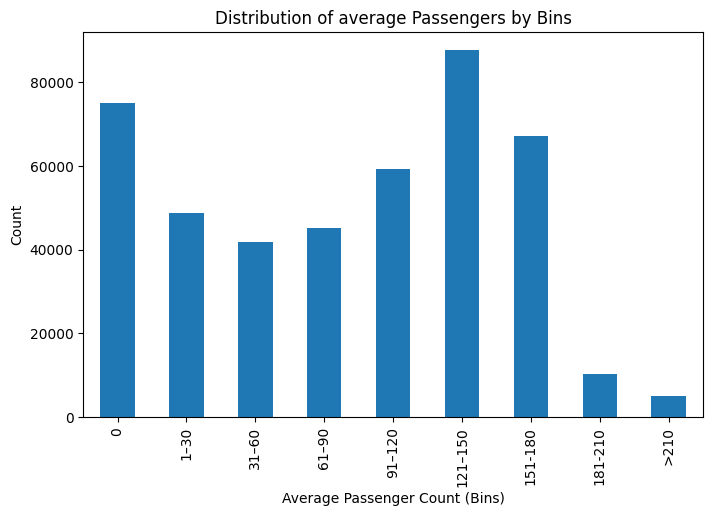

In [19]:
# Define bins and labels
bins = [-1, 0, 30, 60, 90, 120, 150, 180, 210, data["avg_passengers_per_flight"].max()]
labels = ["0", "1–30", "31–60", "61–90", "91–120", "121–150", "151-180", "181-210", ">210"]

# Assign average passengers to bins
data["avg_passengers_binned"] = pd.cut(data["avg_passengers_per_flight"], bins=bins, labels=labels)

# Count passengers in each bin
counts = data["avg_passengers_binned"].value_counts().sort_index()

# Visualize the distribution
counts.plot(kind="bar", figsize=(8,5))
plt.xlabel("Average Passenger Count (Bins)")
plt.ylabel("Count")
plt.title("Distribution of average Passengers by Bins")
plt.show()

Create column 'Route' as origin-destination pair

In [20]:
data["route"] = data["origin"] + "-" + data["dest"]

In [21]:
data.head()

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest_city_name,dest_state_fips,aircraft_type,aircraft_config,year,month,avg_passengers_per_flight,avg_seats_per_flight,avg_passengers_binned,route
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,...,"Chicago, IL",17,622,1,2024,10,<NA>,<NA>,NaN,ORD-MDW
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,"Westerly, RI",44,79,1,2024,1,<NA>,<NA>,NaN,BID-WST
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,"Westerly, RI",44,79,1,2024,7,<NA>,<NA>,NaN,BID-WST
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,"Westerly, RI",44,79,1,2024,8,<NA>,<NA>,NaN,BID-WST
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,"Westerly, RI",44,79,1,2024,12,<NA>,<NA>,NaN,BID-WST


Check count of routes

In [22]:
data["route"].value_counts()[:10]

route
LAX-LAS    391
LAS-LAX    390
LAX-SFO    385
SFO-LAX    348
ANC-ORD    345
IAH-DFW    315
DFW-IAH    304
DEN-SLC    302
SLC-DEN    296
MSP-ORD    295
Name: count, dtype: int64

Check entries where origin = destination

In [23]:
# Show some examples of entries where origin = destination
data[data["origin"] == data["dest"]][:10]

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest_city_name,dest_state_fips,aircraft_type,aircraft_config,year,month,avg_passengers_per_flight,avg_seats_per_flight,avg_passengers_binned,route
164,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,38.0,...,"Fairbanks, AK",2,416,2,2024,7,0,0,0,FAI-FAI
165,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,216.0,174.0,...,"Dallas/Fort Worth, TX",48,626,1,2024,3,0,0,0,AFW-AFW
363,0.0,1.0,600.0,3.0,0.0,0.0,0.0,0.0,4.0,3.0,...,"Fairbanks, AK",2,34,1,2024,8,0,3,0,FAI-FAI
364,0.0,1.0,600.0,3.0,0.0,0.0,0.0,0.0,60.0,58.0,...,"Bettles, AK",2,34,1,2024,8,0,3,0,BTT-BTT
380,0.0,1.0,600.0,3.0,2.0,0.0,0.0,0.0,72.0,68.0,...,"Nome, AK",2,360,1,2024,2,2,3,1–30,OME-OME
388,0.0,1.0,750.0,3.0,0.0,0.0,0.0,0.0,50.0,48.0,...,"Manley Hot Springs, AK",2,34,1,2024,6,0,3,0,MLY-MLY
449,0.0,1.0,750.0,3.0,1.0,0.0,0.0,0.0,30.0,28.0,...,"Fairbanks, AK",2,34,1,2024,3,1,3,1–30,FAI-FAI
450,0.0,1.0,750.0,3.0,1.0,0.0,0.0,0.0,85.0,83.0,...,"Fairbanks, AK",2,34,1,2024,10,1,3,1–30,FAI-FAI
476,0.0,1.0,750.0,3.0,2.0,0.0,0.0,0.0,40.0,38.0,...,"Fairbanks, AK",2,34,1,2024,4,2,3,1–30,FAI-FAI
543,0.0,1.0,750.0,4.0,2.0,0.0,0.0,0.0,30.0,24.0,...,"Juneau, AK",2,35,4,2024,3,2,4,1–30,JNU-JNU


In [24]:
# Calculate and print percentage of entries where origin = destination
same_airport_count = (data["origin"] == data["dest"]).sum()
percent_same = 100 * same_airport_count / len(data)
print(f"{same_airport_count} rows ({percent_same:.2f} %) have origin = destination")

4148 rows (0.94 %) have origin = destination


Remove entries where origin = destination since such flights are not supposed to be part of the model

In [25]:
# Drop rows and check how many rows were removed
before = len(data)
data = data[data["origin"] != data["dest"]].copy()
after = len(data)

print(f"Removed rows: {before - after}")
print(f"Remaining rows: {after}")


Removed rows: 4148
Remaining rows: 436603


Create column route_type: domestic, international/unknown

In [26]:
# Load FIPS mapping file
fips_mapping = pd.read_csv("../data/fips_codes.csv")

In [30]:
# Check data types and strip whitespace
fips_mapping["Code"] = fips_mapping["Code"].astype(str).str.strip()
fips_mapping["Description"] = fips_mapping["Description"].astype(str).str.strip()

# Ensure origin/destination FIPS are strings
data["origin_state_fips"] = data["origin_state_fips"].astype(str).str.strip()
data["dest_state_fips"] = data["dest_state_fips"].astype(str).str.strip()

# Function to classify route type: Codes 1–56 = U.S. States
def classify_route_type(origin_fips, destination_fips):
    domestic_fips = set(str(x) for x in range(1, 57))  
    if origin_fips in domestic_fips and destination_fips in domestic_fips:
        return "Domestic"
    else:
        return "International/Unknown"

# Add new column route_type
data["route_type"] = data.apply(
    lambda row: classify_route_type(row["origin_state_fips"], row["dest_state_fips"]),
    axis=1
)

# Check distribution of route types
print(data["route_type"].value_counts())

route_type
Domestic                 430082
International/Unknown      6521
Name: count, dtype: int64


In [31]:
data.head()

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest_state_fips,aircraft_type,aircraft_config,year,month,avg_passengers_per_flight,avg_seats_per_flight,avg_passengers_binned,route,route_type
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,...,17,622,1,2024,10,<NA>,<NA>,NaN,ORD-MDW,Domestic
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,44,79,1,2024,1,<NA>,<NA>,NaN,BID-WST,Domestic
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,44,79,1,2024,7,<NA>,<NA>,NaN,BID-WST,Domestic
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,44,79,1,2024,8,<NA>,<NA>,NaN,BID-WST,Domestic
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,44,79,1,2024,12,<NA>,<NA>,NaN,BID-WST,Domestic


Count entries with departures_performed = 0

In [32]:
count_departures_0 = (data["departures_performed"] == 0).sum()
print("Rows with departures_performed = 0:", count_departures_0)

Rows with departures_performed = 0: 547


Count entries with passengers = 0

In [33]:
count_passengers_0 = (data["passengers"] == 0).sum()
print("Rows with passengers = 0:", count_passengers_0)


Rows with passengers = 0: 70420


Remove entries where departures_performed = 0 as these most likely did not take place

In [34]:
# Drop rows and check how many rows were removed
before = len(data)
data = data[data["departures_performed"] != 0].copy()
after = len(data)

print(f"Removed rows: {before - after}")
print(f"Remaining rows: {after}")


Removed rows: 547
Remaining rows: 436056


Remove entries where passengers = 0 as these most likely did not take place

In [35]:
# Drop rows and check how many rows were removed
before = len(data)
data = data[data["passengers"] != 0].copy()
after = len(data)

print(f"Removed rows: {before - after}")
print(f"Remaining rows: {after}")

Removed rows: 69873
Remaining rows: 366183


Count number of entries per aircraft type (ID)

In [36]:
# For mapping to aircraft type name see file 'aircraft_type_mapping.csv'
# e.g. 614 = B737-800, 694 = A320-100/200, 673 = ERJ-175...
data["aircraft_type"].value_counts()[:10]

aircraft_type
614    46623
694    37086
838    29296
673    27760
612    24330
698    21119
699    18873
888    15014
721    14617
722    12410
Name: count, dtype: int64

Mapping aircraft_types IDs to aircraft type names using the aircraft_type_mapping file

In [37]:
mapping = pd.read_csv("../data/aircraft_type_mapping.csv")
data["aircraft_type"] = data["aircraft_type"].astype(str).str.strip()
mapping["Code"] = mapping["Code"].astype(str).str.strip()

Merging the mapped data by adding a column 'aircraft_name' to the dataframe

In [39]:
# Merge
data = data.merge(
    mapping,
    left_on="aircraft_type",
    right_on="Code",
    how="left"
)

# New column 'aircraft_name' 
data["aircraft_name"] = data["Description"]

# Delete unnecessary columns
data = data.drop(columns=["Code", "Description"])

In [40]:
data.head()

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,aircraft_type,aircraft_config,year,month,avg_passengers_per_flight,avg_seats_per_flight,avg_passengers_binned,route,route_type,aircraft_name
0,0.0,1.0,440.0,11.0,2.0,0.0,0.0,337.0,0.0,0.0,...,754,1,2024,5,2,11,1–30,LAX-SFO,Domestic,Embraer Praetor 600
1,0.0,1.0,500.0,2.0,1.0,0.0,0.0,7.0,18.0,10.0,...,36,1,2024,6,1,2,1–30,TYE-BVU,Domestic,Cessna 172 Skyhawk
2,0.0,1.0,500.0,2.0,1.0,0.0,0.0,40.0,28.0,20.0,...,36,1,2024,7,1,2,1–30,MRI-BVU,Domestic,Cessna 172 Skyhawk
3,0.0,1.0,500.0,2.0,1.0,0.0,0.0,40.0,28.0,20.0,...,36,1,2024,4,1,2,1–30,BVU-MRI,Domestic,Cessna 172 Skyhawk
4,0.0,1.0,500.0,2.0,1.0,0.0,0.0,40.0,29.0,21.0,...,36,1,2024,10,1,2,1–30,BVU-MRI,Domestic,Cessna 172 Skyhawk


Sum departures_performed for each aircraft_name and get the top 15

In [41]:
aircraft_departures = (
    data.groupby("aircraft_name")["departures_performed"].sum()
    .sort_values(ascending=False)
    .iloc[:15]
)


Visualize top 15 aircraft types by departures performed

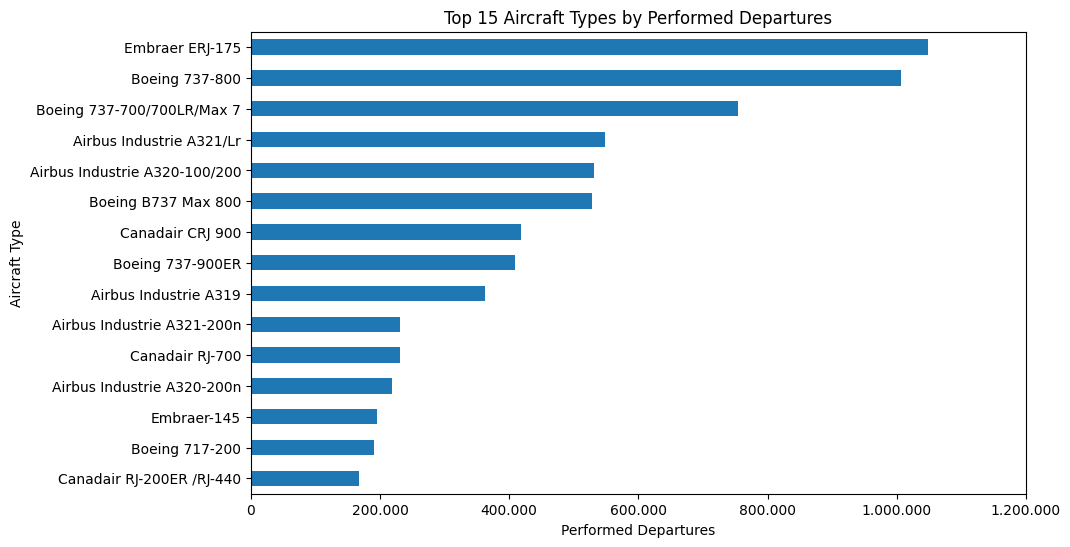

In [42]:
ax = aircraft_departures.plot(kind="barh", figsize=(10,6))
ax.ticklabel_format(style="plain", axis="x")
xticks = ax.get_xticks()
ax.set_xticks(xticks)
ax.set_xticklabels([f"{int(x):,}".replace(",", ".") for x in xticks])
plt.xlabel("Performed Departures")
plt.ylabel("Aircraft Type")
plt.title("Top 15 Aircraft Types by Performed Departures")
plt.gca().invert_yaxis()
plt.show()



Analyze and visualize top 15 aircraft types by passenger numbers

In [43]:
aircraft_passengers = (
    data.groupby("aircraft_name")["passengers"].sum()
    .sort_values(ascending=False)
    .iloc[:15]
)

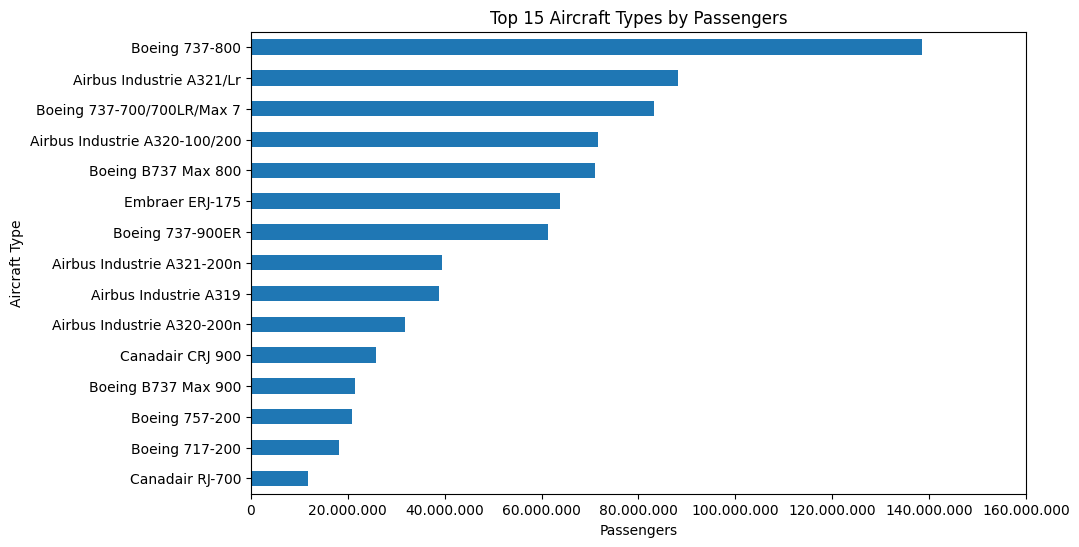

In [44]:
ax = aircraft_passengers.plot(kind="barh", figsize=(10,6))
ax.ticklabel_format(style="plain", axis="x")
xticks = ax.get_xticks()
ax.set_xticks(xticks)
ax.set_xticklabels([f"{int(x):,}".replace(",", ".") for x in xticks])

plt.xlabel("Passengers")
plt.ylabel("Aircraft Type")
plt.title("Top 15 Aircraft Types by Passengers")
plt.gca().invert_yaxis()
plt.show()

Analyze and visualize top 15 routes by passenger numbers

In [45]:
route_passengers = (
    data.groupby("route")["passengers"].sum()
    .sort_values(ascending=False)
    .iloc[:15]   
)

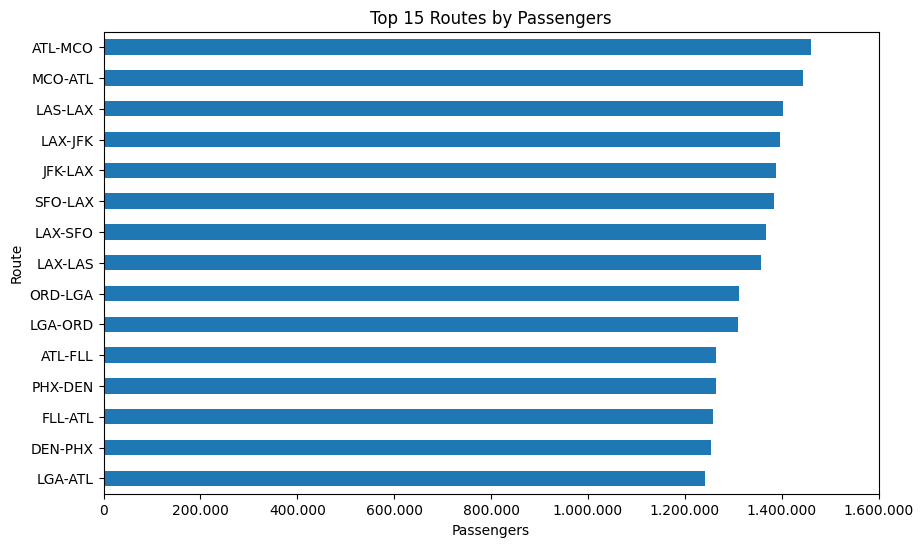

In [46]:
ax = route_passengers.plot(kind="barh", figsize=(10,6))
ax.ticklabel_format(style="plain", axis="x")
xticks = ax.get_xticks()
ax.set_xticks(xticks)
ax.set_xticklabels([f"{int(x):,}".replace(",", ".") for x in xticks])
plt.xlabel("Passengers")
plt.ylabel("Route")
plt.title("Top 15 Routes by Passengers")
plt.gca().invert_yaxis()
plt.show()

Analyze and visualize top 15 aircraft types by average passenger numbers per flight

In [47]:
route_avg_pax = (
    data.groupby("route")["avg_passengers_per_flight"]
    .mean()
    .sort_values(ascending=False)
    .iloc[:15]                    
)

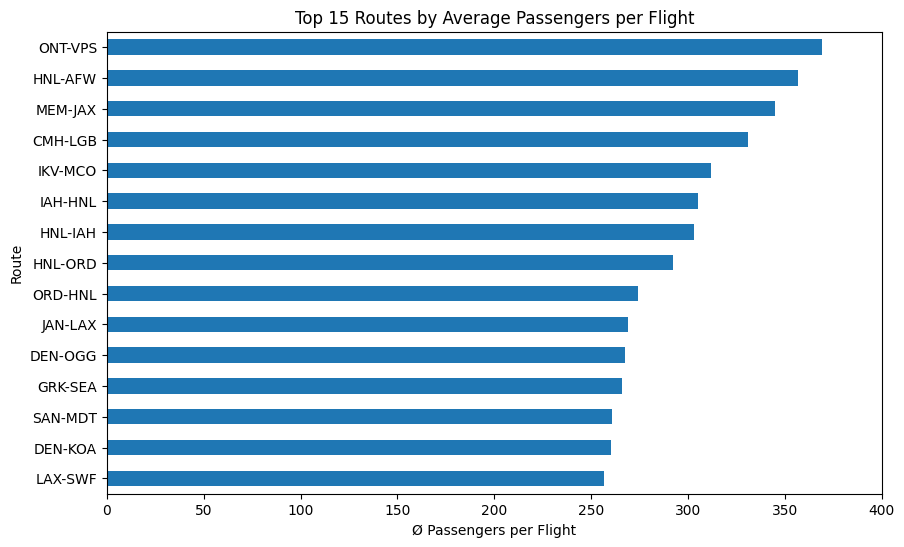

In [48]:
ax = route_avg_pax.plot(kind="barh", figsize=(10,6))
ax.ticklabel_format(style="plain", axis="x") 
xticks = ax.get_xticks()
ax.set_xticks(xticks)
ax.set_xticklabels([f"{x:,.0f}".replace(",", ".") for x in xticks])
plt.xlabel("Ø Passengers per Flight")
plt.ylabel("Route")
plt.title("Top 15 Routes by Average Passengers per Flight")
plt.gca().invert_yaxis()
plt.show()

Analyze and visualize the distribution of average passengers per flight per route (top 15 routes by number of flights)

<Figure size 1200x600 with 0 Axes>

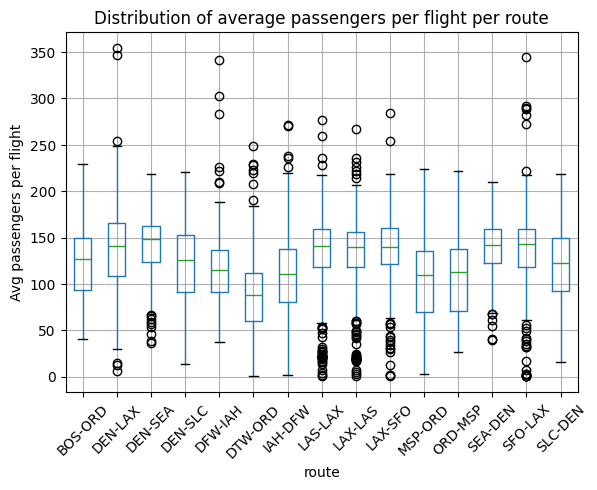

In [49]:
# Route count
top15_routes = data["route"].value_counts().head(15).index
subset = data[data["route"].isin(top15_routes)]

# Plot
plt.figure(figsize=(12,6))
subset.boxplot(column="avg_passengers_per_flight", by="route", rot=45)
plt.ylabel("Avg passengers per flight")
plt.title("Distribution of average passengers per flight per route")
plt.suptitle("")
plt.show()

Analyze and visualize the distribution of average passengers per flight per route (top 15 routes ranked by average passenger count per flight)

<Figure size 1200x600 with 0 Axes>

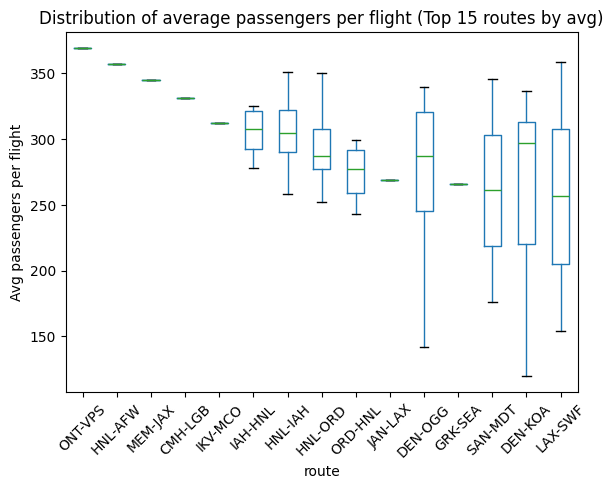

In [50]:
# Avg. passenger count
route_avg = (
    data.groupby("route")["avg_passengers_per_flight"]
    .mean()
    .sort_values(ascending=False)
)
top15_routes = route_avg.head(15).index
subset = data[data["route"].isin(top15_routes)].copy()
subset["route"] = pd.Categorical(subset["route"], categories=list(top15_routes), ordered=True)

# Plot
plt.figure(figsize=(12,6))
subset.boxplot(column="avg_passengers_per_flight", by="route", rot=45, grid=False)
plt.ylabel("Avg passengers per flight")
plt.title("Distribution of average passengers per flight (Top 15 routes by avg)")
plt.suptitle("")
plt.show()



Average passengers per flight is biased by aircraft size and seating configuration -> the passenger load factor is a better indicator as it normalizes demand relative to capacity

In [51]:
# Add pax_load_factor to data
data["pax_load_factor"] = (
    (data["passengers"] / data["seats"].replace(0, np.nan))
    .round(2)
)

In [52]:
data.tail(10)

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,aircraft_config,year,month,avg_passengers_per_flight,avg_seats_per_flight,avg_passengers_binned,route,route_type,aircraft_name,pax_load_factor
366173,777.0,777.0,932400.0,4135.0,2545.0,11093.0,0.0,11.0,10302.0,7971.0,...,1,2024,6,3,5,1–30,SPN-TIQ,International/Unknown,Piper PA-32 (Cherokee 6),0.62
366174,801.0,801.0,961200.0,4254.0,2599.0,16924.0,0.0,11.0,10938.0,8535.0,...,1,2024,5,3,5,1–30,SPN-TIQ,International/Unknown,Piper PA-32 (Cherokee 6),0.61
366175,889.0,886.0,2360400.0,7992.0,5182.0,10195.0,0.0,59.0,33406.0,24906.0,...,1,2024,6,6,9,1–30,ANC-ENA,Domestic,Cessna 208 Caravan,0.65
366176,891.0,889.0,2367000.0,8002.0,4689.0,5250.0,0.0,59.0,33895.0,26497.0,...,1,2024,6,5,9,1–30,ENA-ANC,Domestic,Cessna 208 Caravan,0.59
366177,987.0,986.0,2900400.0,8874.0,7626.0,6509.0,0.0,59.0,38376.0,29634.0,...,1,2024,8,8,9,1–30,ENA-ANC,Domestic,Cessna 208 Caravan,0.86
366178,989.0,987.0,2902800.0,8892.0,5602.0,8038.0,0.0,59.0,38105.0,28285.0,...,1,2024,8,6,9,1–30,ANC-ENA,Domestic,Cessna 208 Caravan,0.63
366179,995.0,994.0,2737200.0,8946.0,7247.0,10718.0,0.0,59.0,37921.0,27463.0,...,1,2024,7,7,9,1–30,ANC-ENA,Domestic,Cessna 208 Caravan,0.81
366180,999.0,998.0,2748200.0,8991.0,6631.0,5663.0,0.0,59.0,39218.0,30137.0,...,1,2024,7,7,9,1–30,ENA-ANC,Domestic,Cessna 208 Caravan,0.74
366181,1522.0,1522.0,1826400.0,8026.0,5084.0,10340.0,0.0,11.0,17768.0,13202.0,...,1,2024,7,3,5,1–30,TIQ-SPN,International/Unknown,Piper PA-32 (Cherokee 6),0.63
366182,1574.0,1574.0,1888800.0,8284.0,5104.0,29100.0,0.0,11.0,20390.0,15668.0,...,1,2024,7,3,5,1–30,SPN-TIQ,International/Unknown,Piper PA-32 (Cherokee 6),0.62


Analyze and visualize the top 15 routes, ranked by average passenger load factor

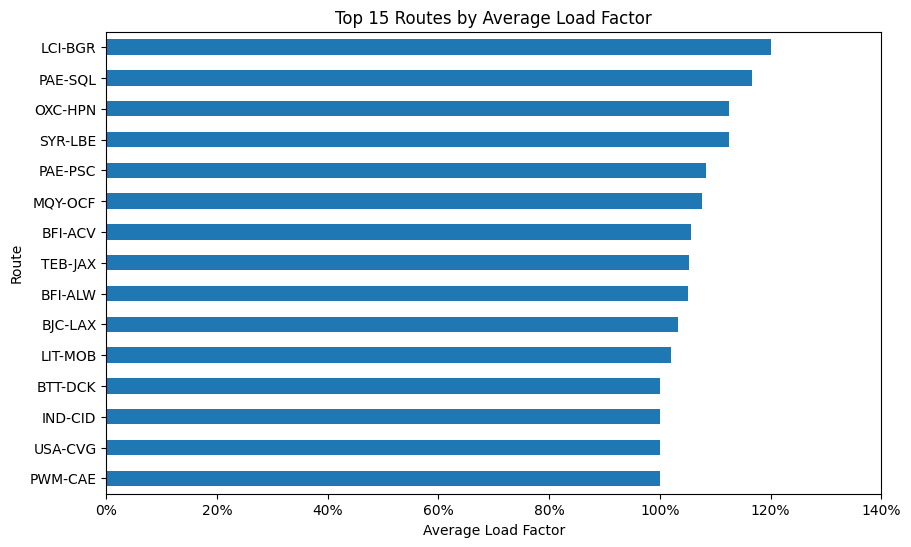

In [53]:
# Check route load factor
route_load_factor = (
    data.groupby("route")[["passengers", "seats"]]
    .sum()
    .assign(pax_load_factor=lambda d: d["passengers"] / d["seats"])
    .sort_values("pax_load_factor", ascending=False)
    .head(15)
)

# Plot
ax = route_load_factor["pax_load_factor"].plot(kind="barh", figsize=(10,6))
plt.ylabel("Route")
plt.xlabel("Average Load Factor")
plt.title("Top 15 Routes by Average Load Factor")
plt.gca().invert_yaxis()
xticks = ax.get_xticks()
ax.set_xticks(xticks)
ax.set_xticklabels([f"{x:.0%}" for x in xticks])

plt.show()

Analyze and visualize the distribution of passenger load factor for the top 15 routes (ranked by weighted average load factor)

<Figure size 1200x600 with 0 Axes>

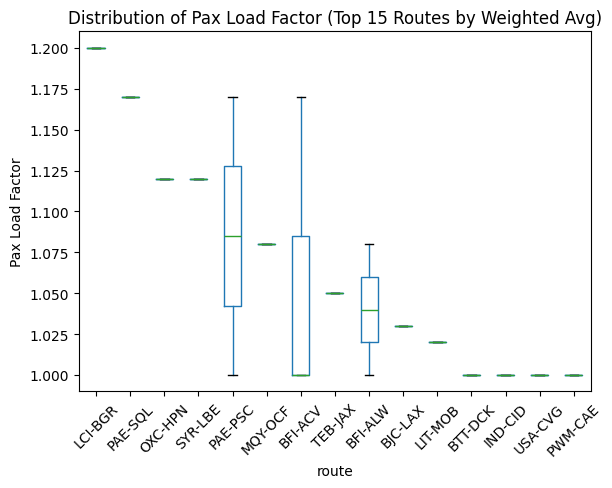

In [54]:
# Check pax load factor
top15_routes_load_factor = route_load_factor.head(15).index
subset = data[data["route"].isin(top15_routes_load_factor)].copy()
subset["route"] = pd.Categorical(subset["route"], categories=list(top15_routes_load_factor), ordered=True)

# Plot
plt.figure(figsize=(12,6))
subset.boxplot(column="pax_load_factor", by="route", rot=45, grid=False)
plt.ylabel("Pax Load Factor")
plt.title("Distribution of Pax Load Factor (Top 15 Routes by Weighted Avg)")
plt.suptitle("")
plt.show()



Check load factors > 1

In [55]:
# Cases with Load Factor > 1 
overs = data[data["pax_load_factor"] > 1]
print(overs[["route", "passengers", "seats", "pax_load_factor"]].head(20))

         route  passengers  seats  pax_load_factor
405    LCI-BGR         6.0    5.0             1.20
406    LCI-BGR         6.0    5.0             1.20
2275   VNY-PGA         8.0    7.0             1.14
2806   SJC-VNY         9.0    8.0             1.12
4924   PAE-PSC         7.0    6.0             1.17
4925   BFI-SUO         7.0    6.0             1.17
4926   ACV-BFI         7.0    6.0             1.17
4927   BFI-ACV         7.0    6.0             1.17
4928   PAE-SQL         7.0    6.0             1.17
5134   ARC-VEE        10.0    9.0             1.11
10862  HPN-TEB         9.0    8.0             1.12
10863  MVY-ACK         9.0    8.0             1.12
10864  OXC-HPN         9.0    8.0             1.12
10865  BED-ACK         9.0    8.0             1.12
10866  ACK-BED         9.0    8.0             1.12
10867  BDR-ACK         9.0    8.0             1.12
10868  ACK-BDR         9.0    8.0             1.12
10869  MVY-LGA         9.0    8.0             1.12
10870  MVY-LGA         9.0    8

In [56]:
count_over = (data["pax_load_factor"] > 1.0).sum()
percent_over = 100 * count_over / len(data)

print(f"Count: {count_over}")
print(f"Share: {percent_over:.2f}%")

Count: 56
Share: 0.02%


Remove entries with passenger load factor > 1 and passenger load factor < 0 

In [57]:
# Remove implausible load factors (<0 or >1)
before = len(data)
data = data[(data["pax_load_factor"] >= 0) & (data["pax_load_factor"] <= 1)].copy()
after = len(data)

print(f"Removed rows: {before - after} ({(before - after)/before*100:.2f}%)")
print(f"Remaining rows: {after}")

Removed rows: 57 (0.02%)
Remaining rows: 366126


Check and visualize flop 15 routes by passenger load factor

In [58]:
flop15_route_load_factor = (
    data.groupby("route")[["passengers", "seats"]]
        .sum(min_count=1)
        .query("seats > 0")
        .assign(pax_load_factor=lambda d: d["passengers"] / d["seats"])
        .sort_values("pax_load_factor", ascending=True)
        .head(15)
)

print(flop15_route_load_factor.head(20))

         passengers  seats  pax_load_factor
route                                      
GSO-ONT         2.0  894.0         0.002237
MCO-MGM         1.0  290.0         0.003448
GRR-LCK         1.0  290.0         0.003448
CDW-HTO         1.0  184.0         0.005435
ELP-SMF         1.0  180.0         0.005556
TUL-FLL         1.0  175.0         0.005714
LNK-TUS         1.0  170.0         0.005882
AEX-LAX         1.0  170.0         0.005882
GSO-LFI         1.0  150.0         0.006667
BED-SLN         1.0  150.0         0.006667
FLL-HRL         1.0  150.0         0.006667
ELP-RDU         1.0  150.0         0.006667
FRG-BTR         1.0  150.0         0.006667
SLN-TUS         1.0  150.0         0.006667
MQY-BNA         1.0  150.0         0.006667


In [60]:
print("NaN-Values:", flop15_route_load_factor["pax_load_factor"].isna().sum())
print("Min:", flop15_route_load_factor["pax_load_factor"].min())
print("Max:", flop15_route_load_factor["pax_load_factor"].max())
print("Average:", flop15_route_load_factor["pax_load_factor"].mean())


NaN-Values: 0
Min: 0.0022371364653243847
Max: 0.006666666666666667
Average: 0.005617978974467923


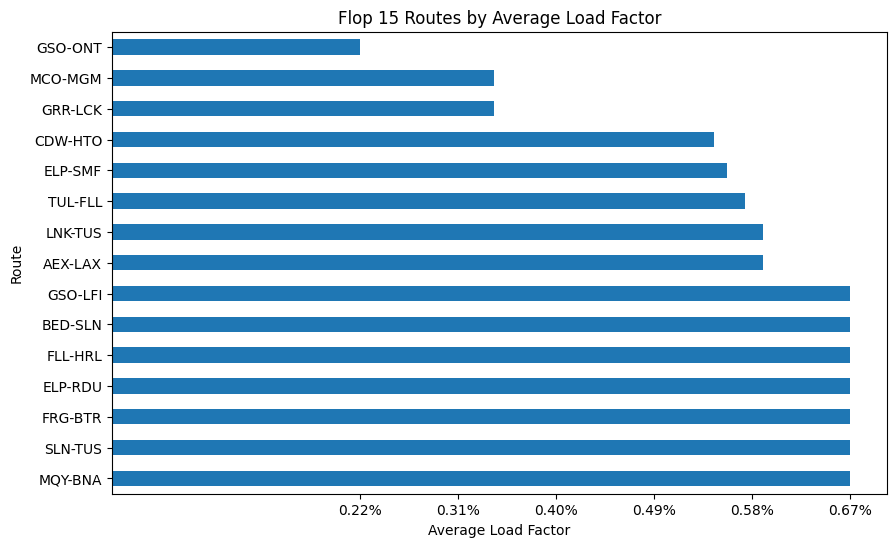

In [61]:
flop15_route_load_factor = (
    data.groupby("route")[["passengers", "seats"]]
    .sum()
    .assign(pax_load_factor=lambda d: d["passengers"] / d["seats"])
    .query("pax_load_factor > 0")
    .sort_values("pax_load_factor", ascending=True)
    .head(15)
)
ax = flop15_route_load_factor["pax_load_factor"].plot(kind="barh", figsize=(10,6))
plt.ylabel("Route")
plt.xlabel("Average Load Factor")
plt.title("Flop 15 Routes by Average Load Factor")
plt.gca().invert_yaxis()
xmin, xmax = flop15_route_load_factor["pax_load_factor"].min(), flop15_route_load_factor["pax_load_factor"].max()
xticks = np.linspace(xmin, xmax, 6)
ax.set_xticks(xticks)
ax.set_xticklabels([f"{x:.2%}" for x in xticks])

plt.show()

Analyze and visualize the distribution of passenger load factor for domestic vs. international/unknown routes

<Figure size 1200x600 with 0 Axes>

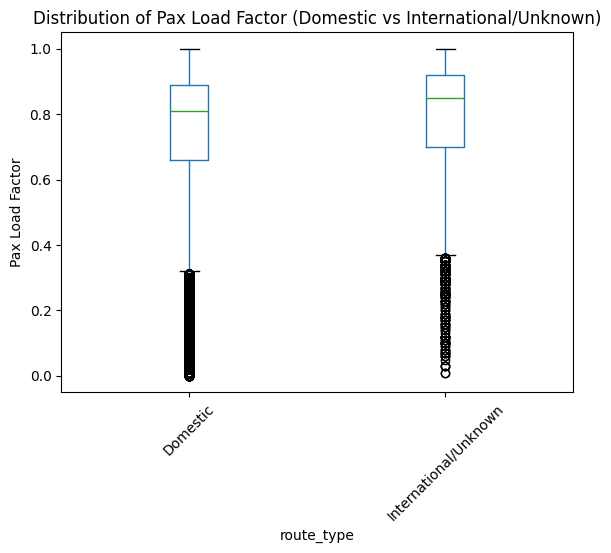

In [73]:
plt.figure(figsize=(12,6))
data.boxplot(column="pax_load_factor", by="route_type", rot=45, grid=False)
plt.ylabel("Pax Load Factor")
plt.title("Distribution of Pax Load Factor (Domestic vs International/Unknown)")
plt.suptitle("")
plt.show()

Count data entries per aircraft type

In [62]:
data["aircraft_name"].value_counts()[:20]

aircraft_name
Boeing 737-800                        46623
Airbus Industrie A320-100/200         37084
Boeing B737 Max 800                   29296
Embraer ERJ-175                       27760
Boeing 737-700/700LR/Max 7            24329
Airbus Industrie A319                 21119
Airbus Industrie A321/Lr              18873
Boeing 737-900ER                      15014
Airbus Industrie A321-200n            14617
Airbus Industrie A320-200n            12410
Canadair CRJ 900                      11445
Canadair RJ-700                        8974
Boeing B737 Max 900                    8973
Cessna C206/207/209/210 Stationair     7558
Cessna 208 Caravan                     7191
A220-300 BD-500-1A11                   6413
Pilatus PC-12                          5750
Boeing 757-200                         5664
Embraer-Emb-170                        4714
Cessna C208B/Grand Caravan             4473
Name: count, dtype: int64

Count entries with seats = 0

In [63]:
# No seats
count_zero_seats= (data["seats"] == 0).sum()
print("Number of flights with 0 seats:", count_zero_seats)

# Share
share_zero_seats = 100 * count_zero_seats / len(data)
print(f"Share: {share_zero_seats:.2f}%")

Number of flights with 0 seats: 0
Share: 0.00%


Check flights with small number of seats

In [64]:
# Less than 30 seats (>0)
count_small = ((data["seats"] > 0) & (data["seats"] < 30)).sum()
print("Number of flights with 1–29 seats:", count_small)

# Share
share_small = 100 * count_small / len(data)
print(f"Share: {share_small:.2f}%")

Number of flights with 1–29 seats: 24638
Share: 6.73%


Verify whether entries with a low seat count correspond to small aircraft types

In [65]:
small_aircraft = data[(data["seats"] > 0) & (data["seats"] < 30)]

print(small_aircraft["aircraft_name"].unique())

['Embraer Praetor 600' 'Cessna 172 Skyhawk' 'Helio H-250/295/395'
 'Dassault Falcon 7X' 'Bombardier Global 7500 BD-7500'
 'Cessna C206/207/209/210 Stationair' 'Cessna 180'
 'Cessna 510 Mustang/560XL Citation Excel' 'Cessna 208 Caravan'
 'Piper PA-31 (Navajo)/T-1020' 'Embraer Legacy 500'
 'Piper PA-32 (Cherokee 6)' 'Cessna Citation II/ Bravo'
 'Bombardier Global 6000/Global Xrs' 'Bombardier Global 5000'
 'De Havilland DHC2 Beaver' 'Sikorsky S-76'
 'Cessna Citationjet/CJ1/CJ2/CJ3' 'Land-Turbine' 'Pilatus PC-12'
 'Bombardier BD-100-1A10 Challenger 300' 'Bomardier Challenger 350'
 'Bombardier Challenger 604/605' 'Cessna 185A/B/C Skywagon'
 'Gipps Aero Ga8 Airvan' 'Cessna Citation X Model 650/550B/550XL'
 'Raytheon Beechcraft Hawker 400XP' 'Cessna CE-680 Citation Sovereign'
 'Dassault Falcon 2000EX/2000lxs' 'Cessna C-402/402A/402B'
 'Gulfstream Aerospace G500' 'Bell 212 Twin Two Twelve' 'Gulfstream G200'
 'Canadair (Bombardier) Challlenger 601'
 'Raytheon Beechcraft Hawker 800XP' 'Gulfstrea

Check data of bigger aircrafts in list

In [66]:
# Check bigger aircrafts in list
suspect_types = [
    "Airbus Industrie A319",
    "Airbus Industrie A320-100/200",
    "A200-100 BD-500-1A10",
    "Boeing 737-400",
    "Boeing 737-700/700LR/Max 7",
    "Boeing 737-800",
    "Boeing 747-400"
]

# Filter rows with suspect aircraft types
suspect = small_aircraft[
    small_aircraft["aircraft_name"].isin(suspect_types)
][["year","month","origin","dest","departures_performed","aircraft_name","seats","avg_seats_per_flight","passengers","departures_performed", "pax_load_factor"]]

suspect.head(15)

,year,month,origin,dest,departures_performed,aircraft_name,seats,avg_seats_per_flight,passengers,departures_performed,pax_load_factor
15518,2024,9,DAL,LEX,1.0,Airbus Industrie A319,19.0,19,5.0,1.0,0.26
18453,2024,10,BGR,HSH,1.0,A200-100 BD-500-1A10,16.0,16,3.0,1.0,0.19
18454,2024,10,HSH,PTK,1.0,A200-100 BD-500-1A10,16.0,16,5.0,1.0,0.31
18455,2024,6,HPN,IND,1.0,A200-100 BD-500-1A10,18.0,18,2.0,1.0,0.11
20214,2024,1,CVG,HRL,1.0,Boeing 737-400,3.0,3,3.0,1.0,1.00
24443,2024,2,STL,OMA,1.0,Boeing 737-800,1.0,1,1.0,1.0,1.00
33053,2024,12,FLL,MSY,1.0,Boeing 737-700/700LR/Max 7,19.0,19,2.0,1.0,0.11
45259,2024,2,RIC,ROC,2.0,Boeing 737-800,1.0,0,1.0,2.0,1.00
49682,2024,2,ROC,CVG,3.0,Boeing 737-800,1.0,0,1.0,3.0,1.00
49683,2024,1,SAT,CVG,3.0,Boeing 737-800,3.0,1,3.0,3.0,1.00


Map the aircraft configuration (passenger, freight...) and merge the data

In [67]:
config_mapping = pd.read_csv("../data/config_mapping.csv")
data["aircraft_config"] = data["aircraft_config"].astype(str).str.strip()
config_mapping["Code"] = config_mapping["Code"].astype(str).str.strip()

# Merge
data = data.merge(
    config_mapping, left_on="aircraft_config", right_on="Code", how="left"
)

# New column 'configuration_desc'
data["configuration_desc"] = data["Description"]

# Delete unnecessary columns
data = data.drop(columns=["Code", "Description"])

In [68]:
data.head()

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,year,month,avg_passengers_per_flight,avg_seats_per_flight,avg_passengers_binned,route,route_type,aircraft_name,pax_load_factor,configuration_desc
0,0.0,1.0,440.0,11.0,2.0,0.0,0.0,337.0,0.0,0.0,...,2024,5,2,11,1–30,LAX-SFO,Domestic,Embraer Praetor 600,0.18,Passenger Configuration
1,0.0,1.0,500.0,2.0,1.0,0.0,0.0,7.0,18.0,10.0,...,2024,6,1,2,1–30,TYE-BVU,Domestic,Cessna 172 Skyhawk,0.50,Passenger Configuration
2,0.0,1.0,500.0,2.0,1.0,0.0,0.0,40.0,28.0,20.0,...,2024,7,1,2,1–30,MRI-BVU,Domestic,Cessna 172 Skyhawk,0.50,Passenger Configuration
3,0.0,1.0,500.0,2.0,1.0,0.0,0.0,40.0,28.0,20.0,...,2024,4,1,2,1–30,BVU-MRI,Domestic,Cessna 172 Skyhawk,0.50,Passenger Configuration
4,0.0,1.0,500.0,2.0,1.0,0.0,0.0,40.0,29.0,21.0,...,2024,10,1,2,1–30,BVU-MRI,Domestic,Cessna 172 Skyhawk,0.50,Passenger Configuration


Filter only passenger configuration or config not relevant

In [69]:
# Only relevant configs 
pax_config_data = data[data["configuration_desc"].isin([
    "Aircraft Configuration Not Relevant",
    "Passenger Configuration"
])]

Check again data of bigger aircrafts in list

In [70]:
# Filter rows with suspect aircraft types
small_pax_aircraft = pax_config_data[(pax_config_data["seats"] > 0) & (pax_config_data["seats"] < 30)]
suspect = small_pax_aircraft[
    small_pax_aircraft["aircraft_name"].isin(suspect_types)
][["year","month","origin","dest","departures_performed","aircraft_name","configuration_desc","seats","avg_seats_per_flight","passengers","departures_performed"]]

# Sample
suspect.sample(5)

,year,month,origin,dest,departures_performed,aircraft_name,configuration_desc,seats,avg_seats_per_flight,passengers,departures_performed
15487,2024,9,DAL,LEX,1.0,Airbus Industrie A319,Passenger Configuration,19.0,19,5.0,1.0
18422,2024,10,BGR,HSH,1.0,A200-100 BD-500-1A10,Passenger Configuration,16.0,16,3.0,1.0
33020,2024,12,FLL,MSY,1.0,Boeing 737-700/700LR/Max 7,Passenger Configuration,19.0,19,2.0,1.0
18424,2024,6,HPN,IND,1.0,A200-100 BD-500-1A10,Passenger Configuration,18.0,18,2.0,1.0
18423,2024,10,HSH,PTK,1.0,A200-100 BD-500-1A10,Passenger Configuration,16.0,16,5.0,1.0


In [71]:
print(small_pax_aircraft["aircraft_name"].unique())

['Embraer Praetor 600' 'Cessna 172 Skyhawk' 'Helio H-250/295/395'
 'Dassault Falcon 7X' 'Bombardier Global 7500 BD-7500' 'Cessna 180'
 'Cessna C206/207/209/210 Stationair'
 'Cessna 510 Mustang/560XL Citation Excel' 'Cessna 208 Caravan'
 'Piper PA-31 (Navajo)/T-1020' 'Embraer Legacy 500'
 'Cessna Citation II/ Bravo' 'Bombardier Global 6000/Global Xrs'
 'Bombardier Global 5000' 'Piper PA-32 (Cherokee 6)' 'Sikorsky S-76'
 'Cessna Citationjet/CJ1/CJ2/CJ3' 'Land-Turbine' 'Pilatus PC-12'
 'Bombardier BD-100-1A10 Challenger 300' 'Bomardier Challenger 350'
 'Bombardier Challenger 604/605' 'Gipps Aero Ga8 Airvan'
 'Cessna Citation X Model 650/550B/550XL'
 'Raytheon Beechcraft Hawker 400XP' 'Cessna CE-680 Citation Sovereign'
 'Dassault Falcon 2000EX/2000lxs' 'Gulfstream Aerospace G500'
 'De Havilland DHC2 Beaver' 'Gulfstream G200'
 'Canadair (Bombardier) Challlenger 601'
 'Raytheon Beechcraft Hawker 800XP' 'Gulfstream G450'
 'Gulfstream Aerospace Gulfstream G280' 'Cessna Citation X Model CE750 X

There is no comprehensive official aircraft type list available that can be used for mapping minimum seat counts in order to filter outliers. Therefore, only a targeted analysis of a few larger aircraft types appearing in the '< 30 seats' category

In [72]:
# Check some bigger aircrafts in list
suspects = ["Airbus Industrie A319", "Boeing 737-700/700LR/Max 7", "Embraer 190", "'A200-100 BD-500-1A10", "Boeing B737 Max 800"]

# Rows with < 30 seats
suspect_rows = pax_config_data[
    (pax_config_data["seats"] < 30) & 
    (pax_config_data["aircraft_name"].isin(suspects))
][["year", "month", "origin", "dest", "aircraft_name", "seats", "unique_carrier_name","passengers", "departures_performed", "pax_load_factor"]]

suspect_rows.head(20)

,year,month,origin,dest,aircraft_name,seats,unique_carrier_name,passengers,departures_performed,pax_load_factor
7800,2024,4,SWF,EWR,Boeing B737 Max 800,17.0,"Jet Aviation Flight Services, Inc.",4.0,1.0,0.24
7801,2024,3,PDX,SWF,Boeing B737 Max 800,17.0,"Jet Aviation Flight Services, Inc.",5.0,1.0,0.29
7802,2024,3,SWF,ANC,Boeing B737 Max 800,17.0,"Jet Aviation Flight Services, Inc.",5.0,1.0,0.29
7803,2024,4,SWF,OPF,Boeing B737 Max 800,17.0,"Jet Aviation Flight Services, Inc.",9.0,1.0,0.53
7804,2024,6,EWR,BOS,Boeing B737 Max 800,17.0,"Jet Aviation Flight Services, Inc.",10.0,1.0,0.59
7805,2024,6,IAD,EWR,Boeing B737 Max 800,17.0,"Jet Aviation Flight Services, Inc.",10.0,1.0,0.59
7806,2024,6,VNY,FOK,Boeing B737 Max 800,17.0,"Jet Aviation Flight Services, Inc.",11.0,1.0,0.65
7811,2024,6,EWR,VNY,Boeing B737 Max 800,17.0,"Jet Aviation Flight Services, Inc.",16.0,1.0,0.94
7812,2024,4,OPF,LGA,Boeing B737 Max 800,17.0,"Jet Aviation Flight Services, Inc.",17.0,1.0,1.00
14067,2024,3,AZA,BWI,Embraer 190,19.0,Air Hamburg Luftverkehrsgesellschaft mbH,6.0,1.0,0.32


In [74]:
# Share of (analyzed) suspect rows
share = 100 * len(suspect_rows) / len(pax_config_data)

print(f"Share: {share:.4f}%")

Share: 0.0039%


Check mean of average seats per flight per aircraft type and merge with dataset

In [75]:
mean_seats_per_aircraft = (
    pax_config_data
    .groupby("aircraft_name")["avg_seats_per_flight"]
    .mean()
    .reset_index()
    .sort_values("avg_seats_per_flight", ascending=False)
)

print(mean_seats_per_aircraft.head(15))


                    aircraft_name  avg_seats_per_flight
20      Airbus Industrie A380-800                 505.0
49                  Boeing B747-8                 364.0
6                 Airbus 350-1000            334.666667
45     Boeing 777-300/300ER/333ER            331.297659
44   Boeing 777-200ER/200LR/233LR            322.502222
46       Boeing 787-10 Dreamliner                 318.0
19      Airbus Industrie A350-900             312.34555
15  Airbus Industrie A330-300/333            281.815385
16      Airbus Industrie A330-900            281.213873
18      Airbus Industrie A340-600                 281.0
17      Airbus Industrie A340-300                 279.0
22            B787-900 Dreamliner            270.164444
14      Airbus Industrie A330-200            267.344765
38                 Boeing 747-400            257.886364
21            B787-800 Dreamliner            236.765661


In [76]:
# Merge with dataset
pax_config_data = pax_config_data.merge(
    mean_seats_per_aircraft.rename(columns={"avg_seats_per_flight": "mean_avg_seats_per_type"}),
    on="aircraft_name",
    how="left"
)
pax_config_data.head(15)

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,month,avg_passengers_per_flight,avg_seats_per_flight,avg_passengers_binned,route,route_type,aircraft_name,pax_load_factor,configuration_desc,mean_avg_seats_per_type
0,0.0,1.0,440.0,11.0,2.0,0.0,0.0,337.0,0.0,0.0,...,5,2,11,1–30,LAX-SFO,Domestic,Embraer Praetor 600,0.18,Passenger Configuration,10.025
1,0.0,1.0,500.0,2.0,1.0,0.0,0.0,7.0,18.0,10.0,...,6,1,2,1–30,TYE-BVU,Domestic,Cessna 172 Skyhawk,0.50,Passenger Configuration,2.968056
2,0.0,1.0,500.0,2.0,1.0,0.0,0.0,40.0,28.0,20.0,...,7,1,2,1–30,MRI-BVU,Domestic,Cessna 172 Skyhawk,0.50,Passenger Configuration,2.968056
3,0.0,1.0,500.0,2.0,1.0,0.0,0.0,40.0,28.0,20.0,...,4,1,2,1–30,BVU-MRI,Domestic,Cessna 172 Skyhawk,0.50,Passenger Configuration,2.968056
4,0.0,1.0,500.0,2.0,1.0,0.0,0.0,40.0,29.0,21.0,...,10,1,2,1–30,BVU-MRI,Domestic,Cessna 172 Skyhawk,0.50,Passenger Configuration,2.968056
5,0.0,1.0,500.0,2.0,1.0,50.0,0.0,40.0,28.0,20.0,...,6,1,2,1–30,BVU-MRI,Domestic,Cessna 172 Skyhawk,0.50,Passenger Configuration,2.968056
6,0.0,1.0,500.0,2.0,1.0,50.0,0.0,44.0,33.0,25.0,...,6,1,2,1–30,TYE-MRI,Domestic,Cessna 172 Skyhawk,0.50,Passenger Configuration,2.968056
7,0.0,1.0,500.0,2.0,1.0,80.0,0.0,44.0,33.0,25.0,...,12,1,2,1–30,TYE-MRI,Domestic,Cessna 172 Skyhawk,0.50,Passenger Configuration,2.968056
8,0.0,1.0,500.0,2.0,1.0,90.0,0.0,40.0,29.0,21.0,...,10,1,2,1–30,MRI-BVU,Domestic,Cessna 172 Skyhawk,0.50,Passenger Configuration,2.968056
9,0.0,1.0,600.0,3.0,1.0,0.0,0.0,181.0,90.0,88.0,...,8,1,3,1–30,CXF-FAI,Domestic,Helio H-250/295/395,0.33,Passenger Configuration,2.916667


In [77]:
pax_config_data["mean_avg_seats_per_type"] = pax_config_data["mean_avg_seats_per_type"].round(2)
pax_config_data.head(15)

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,month,avg_passengers_per_flight,avg_seats_per_flight,avg_passengers_binned,route,route_type,aircraft_name,pax_load_factor,configuration_desc,mean_avg_seats_per_type
0,0.0,1.0,440.0,11.0,2.0,0.0,0.0,337.0,0.0,0.0,...,5,2,11,1–30,LAX-SFO,Domestic,Embraer Praetor 600,0.18,Passenger Configuration,10.02
1,0.0,1.0,500.0,2.0,1.0,0.0,0.0,7.0,18.0,10.0,...,6,1,2,1–30,TYE-BVU,Domestic,Cessna 172 Skyhawk,0.50,Passenger Configuration,2.97
2,0.0,1.0,500.0,2.0,1.0,0.0,0.0,40.0,28.0,20.0,...,7,1,2,1–30,MRI-BVU,Domestic,Cessna 172 Skyhawk,0.50,Passenger Configuration,2.97
3,0.0,1.0,500.0,2.0,1.0,0.0,0.0,40.0,28.0,20.0,...,4,1,2,1–30,BVU-MRI,Domestic,Cessna 172 Skyhawk,0.50,Passenger Configuration,2.97
4,0.0,1.0,500.0,2.0,1.0,0.0,0.0,40.0,29.0,21.0,...,10,1,2,1–30,BVU-MRI,Domestic,Cessna 172 Skyhawk,0.50,Passenger Configuration,2.97
5,0.0,1.0,500.0,2.0,1.0,50.0,0.0,40.0,28.0,20.0,...,6,1,2,1–30,BVU-MRI,Domestic,Cessna 172 Skyhawk,0.50,Passenger Configuration,2.97
6,0.0,1.0,500.0,2.0,1.0,50.0,0.0,44.0,33.0,25.0,...,6,1,2,1–30,TYE-MRI,Domestic,Cessna 172 Skyhawk,0.50,Passenger Configuration,2.97
7,0.0,1.0,500.0,2.0,1.0,80.0,0.0,44.0,33.0,25.0,...,12,1,2,1–30,TYE-MRI,Domestic,Cessna 172 Skyhawk,0.50,Passenger Configuration,2.97
8,0.0,1.0,500.0,2.0,1.0,90.0,0.0,40.0,29.0,21.0,...,10,1,2,1–30,MRI-BVU,Domestic,Cessna 172 Skyhawk,0.50,Passenger Configuration,2.97
9,0.0,1.0,600.0,3.0,1.0,0.0,0.0,181.0,90.0,88.0,...,8,1,3,1–30,CXF-FAI,Domestic,Helio H-250/295/395,0.33,Passenger Configuration,2.92


Analyze and visualize distribution of Average Seats per Flight – Top 20 Aircraft Types (by mean)

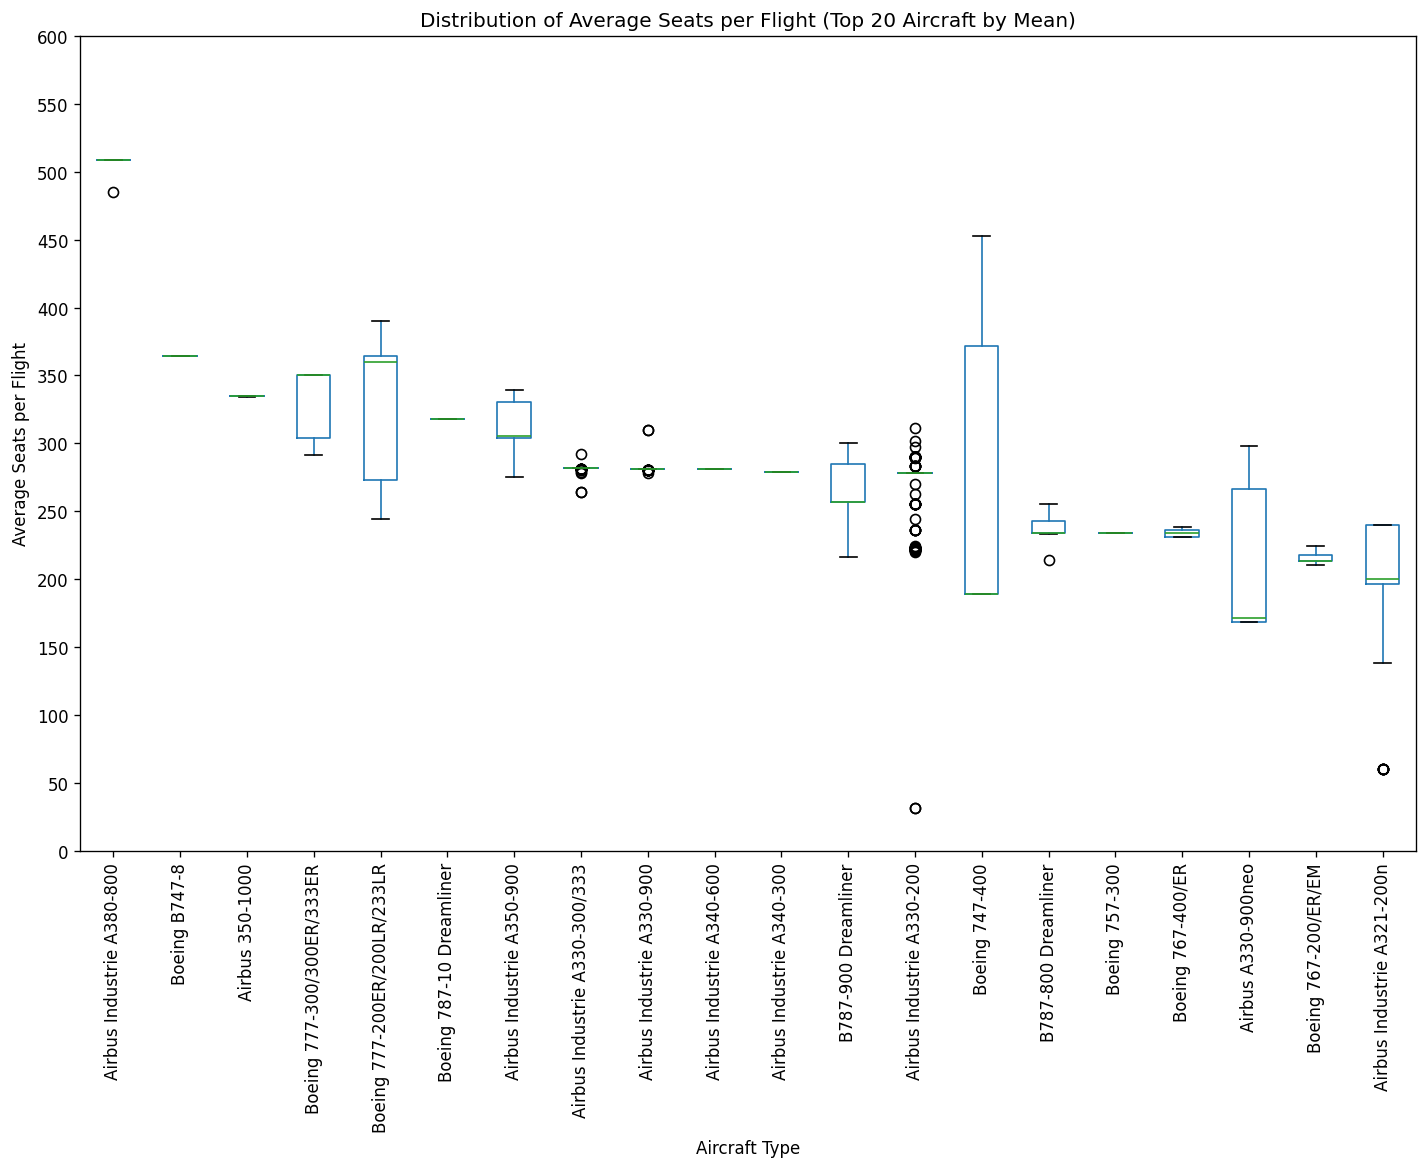

In [78]:
# Top 20 aircraft by mean
top20_names = (
    mean_seats_per_aircraft
    .nlargest(20, "avg_seats_per_flight")
    ["aircraft_name"]
    .tolist()
)

# Subset
subset = pax_config_data[pax_config_data["aircraft_name"].isin(top20_names)].copy()

# Order & remove NaNs
subset["aircraft_name"] = pd.Categorical(subset["aircraft_name"], categories=top20_names, ordered=True)
subset = subset[subset["avg_seats_per_flight"].notna()]

# Boxplot
fig, ax = plt.subplots(figsize = (12, 10), dpi=120)
ax = subset.boxplot(column="avg_seats_per_flight", by="aircraft_name", rot=90, grid=False, ax=ax)
ax.set_ylabel("Average Seats per Flight")
ax.set_title("Distribution of Average Seats per Flight (Top 20 Aircraft by Mean)")
ax.set_xlabel("Aircraft Type")
ax.figure.suptitle("")

ax.set_ylim(0, 600)
ax.set_yticks(np.arange(0, 601, 50))

plt.tight_layout()
plt.show()


Data Cleaning: Filtering implausible seat counts

In [79]:
# Flag whether value is within [50 %, 150 %] of the type mean
pax_config_data["within_range"] = (
    (pax_config_data["avg_seats_per_flight"] >= 0.5 * pax_config_data["mean_avg_seats_per_type"]) &
    (pax_config_data["avg_seats_per_flight"] <= 1.5 * pax_config_data["mean_avg_seats_per_type"])
)

# Count per aircraft how many rows would be removed
outlier_stats = (
    pax_config_data.groupby("aircraft_name")
    .agg(
        total=("avg_seats_per_flight", "size"),
        removed=("within_range", lambda x: (~x).sum())
    )
)

# Calculate share of removed rows in %
outlier_stats["removed_share_%"] = (100 * outlier_stats["removed"] / outlier_stats["total"]).round(2)

print(outlier_stats.sort_values("removed_share_%", ascending=False).head(20))

                                       total  removed  removed_share_%
aircraft_name                                                         
Bombardier Challenger 604/605            851      213            25.03
Canadair (Bombardier) Challlenger 601      5        1             20.0
Boeing 747-400                            44        8            18.18
Cessna Citation II/ Bravo                 51        8            15.69
Sikorsky S-76                             41        6            14.63
Pilatus Britten-Norman BN2/A Islander    162       20            12.35
Fairchild Metro 23                       108       12            11.11
Embraer-135                             1308       77             5.89
Cessna C206/207/209/210 Stationair      6986      259             3.71
Piper PA-31 (Navajo)/T-1020             3588       59             1.64
Bombardier Global 7500 BD-7500            89        1             1.12
Bombardier BD-100-1A10 Challenger 300    291        3             1.03
Airbus

The target variable here is the passenger load factor, which makes the absolute seat count less relevant. However, implausible values in either seats or passengers can still distort the load factor. To mitigate this risk, different thresholds are applied for large and small aircraft types: stricter bounds (50–150 %) for larger aircraft and wider bounds (25–150 %) for smaller aircraft. Entries outside these ranges of the type-specific mean are treated as implausible outliers and removed.

In [80]:
df = pax_config_data.copy()

# Mean avg_seats_per_flight per aircraft_name
mean_seats = (
    df.groupby("aircraft_name")["avg_seats_per_flight"]
      .mean()
      .rename("mean_avg_seats")
)

# Merge 
df = df.merge(mean_seats, on="aircraft_name", how="left")

# Threshold of 100 mean average seats for larger aircrafts
df["is_large_aircraft"] = df["mean_avg_seats"] >= 100

# Define outlier thresholds
lower_large, upper_large = 0.50, 1.50   # 50 – 150 % for larger aircrafts
lower_small, upper_small = 0.25, 1.50   # 25 – 150 % for smaller aircrafts

# 5) Apply rule
lower = np.where(df["is_large_aircraft"], lower_large, lower_small)
upper = np.where(df["is_large_aircraft"], upper_large, upper_small)

df["within_range"] = (
    (df["avg_seats_per_flight"] >= lower * df["mean_avg_seats"]) &
    (df["avg_seats_per_flight"] <= upper * df["mean_avg_seats"])
)

# How much needs to be removed?
stats_overall = pd.DataFrame({
    "total": [len(df)],
    "removed": [(~df["within_range"]).sum()],
})
stats_overall["removed_share_%"] = (100 * stats_overall["removed"] / stats_overall["total"]).round(2)

stats_by_type = (
    df.groupby("aircraft_name")
      .agg(total=("avg_seats_per_flight", "size"),
           removed=("within_range", lambda x: (~x).sum()))
)
stats_by_type["removed_share_%"] = (100 * stats_by_type["removed"] / stats_by_type["total"]).round(2)
stats_by_type = stats_by_type.sort_values("removed_share_%", ascending=False)

print("Total:")
print(stats_overall, "\n")
print("Top 20 types by removed share:")
print(stats_by_type.head(20))

# New dataset
clean_data = df[df["within_range"]].drop(columns=["mean_avg_seats","is_large_aircraft","within_range"]).copy()


Total:
    total  removed  removed_share_%
0  361192     1003             0.28 

Top 20 types by removed share:
                                       total  removed  removed_share_%
aircraft_name                                                         
Bombardier Challenger 604/605            851      163            19.15
Boeing 747-400                            44        8            18.18
Sikorsky S-76                             41        6            14.63
Pilatus Britten-Norman BN2/A Islander    162       20            12.35
Cessna Citation II/ Bravo                 51        6            11.76
Fairchild Metro 23                       108       12            11.11
Cessna C206/207/209/210 Stationair      6986       95             1.36
Bombardier Global 7500 BD-7500            89        1             1.12
Bombardier BD-100-1A10 Challenger 300    291        3             1.03
Airbus Industrie A320-100/200          37084      330             0.89
Cessna C208B/Grand Caravan          

Check dataframe again

In [81]:
clean_data.head()

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,month,avg_passengers_per_flight,avg_seats_per_flight,avg_passengers_binned,route,route_type,aircraft_name,pax_load_factor,configuration_desc,mean_avg_seats_per_type
0,0.0,1.0,440.0,11.0,2.0,0.0,0.0,337.0,0.0,0.0,...,5,2,11,1–30,LAX-SFO,Domestic,Embraer Praetor 600,0.18,Passenger Configuration,10.02
1,0.0,1.0,500.0,2.0,1.0,0.0,0.0,7.0,18.0,10.0,...,6,1,2,1–30,TYE-BVU,Domestic,Cessna 172 Skyhawk,0.50,Passenger Configuration,2.97
2,0.0,1.0,500.0,2.0,1.0,0.0,0.0,40.0,28.0,20.0,...,7,1,2,1–30,MRI-BVU,Domestic,Cessna 172 Skyhawk,0.50,Passenger Configuration,2.97
3,0.0,1.0,500.0,2.0,1.0,0.0,0.0,40.0,28.0,20.0,...,4,1,2,1–30,BVU-MRI,Domestic,Cessna 172 Skyhawk,0.50,Passenger Configuration,2.97
4,0.0,1.0,500.0,2.0,1.0,0.0,0.0,40.0,29.0,21.0,...,10,1,2,1–30,BVU-MRI,Domestic,Cessna 172 Skyhawk,0.50,Passenger Configuration,2.97


In [82]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 360189 entries, 0 to 361191
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   departures_scheduled       360189 non-null  float64 
 1   departures_performed       360189 non-null  float64 
 2   payload                    360189 non-null  float64 
 3   seats                      360189 non-null  float64 
 4   passengers                 360189 non-null  float64 
 5   freight                    360189 non-null  float64 
 6   mail                       360189 non-null  float64 
 7   distance                   360189 non-null  float64 
 8   ramp_to_ramp               360189 non-null  float64 
 9   air_time                   360189 non-null  float64 
 10  unique_carrier             360189 non-null  object  
 11  unique_carrier_name        360189 non-null  object  
 12  carrier_group              360189 non-null  int64   
 13  origin_airport_id  

Feature Selection: Removing non-explanatory or leaking variables

In [83]:
# Drop IDs, names and redundant information (carrier, airport, aircraft name, config description, airport IDs) 
# Drop year and month to avoid introducing time-series effects
# Drop averages, mean and bins, passenger and seat numbers (avg. passengers per flight, avg. seats per flight, passenger bins etc.) because they would cause data leakage

drop_cols = [
    "departures_scheduled", "unique_carrier", "unique_carrier_name",
    "origin", "origin_city_name", "dest", "dest_city_name",
    "origin_airport_id", "dest_airport_id", "origin_state_fips", "dest_state_fips",  
    "year", "month",
    "avg_passengers_per_flight", "avg_seats_per_flight", "avg_passengers_binned",
    "aircraft_name", "configuration_desc", "mean_avg_seats_per_type", "seats", "passengers"
]

clean_data = clean_data.drop(columns=drop_cols)
clean_data.head()

,departures_performed,payload,freight,mail,distance,ramp_to_ramp,air_time,carrier_group,aircraft_type,aircraft_config,route,route_type,pax_load_factor
0,1.0,440.0,0.0,0.0,337.0,0.0,0.0,0,754,1,LAX-SFO,Domestic,0.18
1,1.0,500.0,0.0,0.0,7.0,18.0,10.0,1,36,1,TYE-BVU,Domestic,0.50
2,1.0,500.0,0.0,0.0,40.0,28.0,20.0,1,36,1,MRI-BVU,Domestic,0.50
3,1.0,500.0,0.0,0.0,40.0,28.0,20.0,1,36,1,BVU-MRI,Domestic,0.50
4,1.0,500.0,0.0,0.0,40.0,29.0,21.0,1,36,1,BVU-MRI,Domestic,0.50


Correlation matrix of numerical features (Pearson Coefficients)

The matrix is used to identify linear relationships between numerical features and helps to detect multicollinearity, redundant variables and potential data leakage before modeling

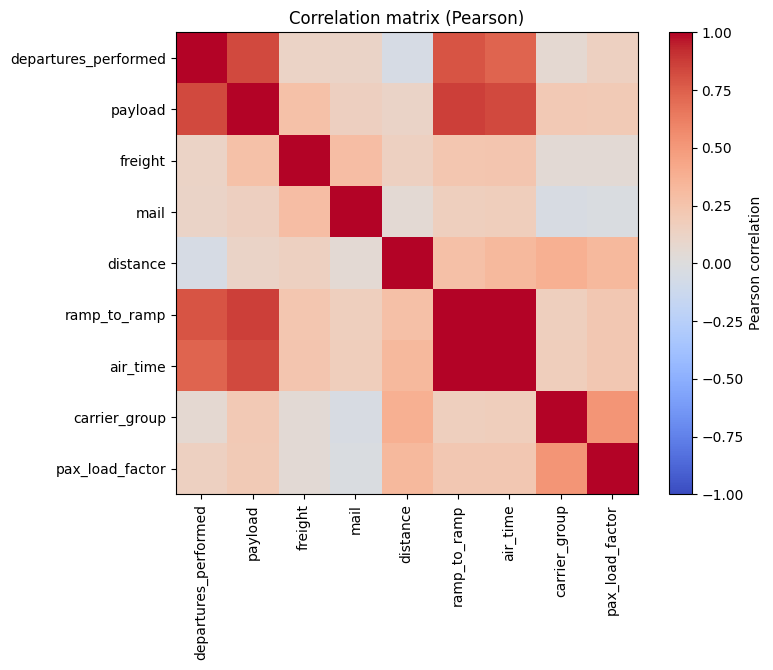

In [84]:
pearson = clean_data.select_dtypes('number').corr(method='pearson')
plt.figure(figsize=(8,6))
plt.imshow(pearson, cmap="coolwarm", vmin=-1, vmax=1)
plt.colorbar(label="Pearson correlation")
plt.xticks(range(len(pearson.columns)), pearson.columns, rotation=90)
plt.yticks(range(len(pearson.index)), pearson.index)
plt.title("Correlation matrix (Pearson)")
plt.show()



Analyze top 10 strongest feature correlations (Pearson)

In [85]:
# Top 10 Correlations
mask = ~np.eye(len(pearson), dtype=bool)
pearson_long = (
    pearson.where(mask)
           .stack()
           .reset_index()
)
pearson_long.columns = ["var1", "var2", "corr"]
top10 = (
    pearson_long
    .assign(abs_corr=lambda d: d["corr"].abs())
    .sort_values("abs_corr", ascending=False)
    .drop_duplicates(subset=["abs_corr"]) 
    .head(10)
)

print(top10)

                    var1             var2      corr  abs_corr
53              air_time     ramp_to_ramp  0.992677  0.992677
41          ramp_to_ramp          payload  0.866228  0.866228
0   departures_performed          payload  0.834614  0.834614
13               payload         air_time  0.831658  0.831658
4   departures_performed     ramp_to_ramp  0.790064  0.790064
5   departures_performed         air_time  0.727410  0.727410
63         carrier_group  pax_load_factor  0.520450  0.520450
38              distance    carrier_group  0.375529  0.375529
39              distance  pax_load_factor  0.327286  0.327286
52              air_time         distance  0.324605  0.324605


Correlation analysis revealed strong relationship between ramp_to_ramp and air_time, since block time (ramp_to_ramp) already includes airborne time (air_time). To avoid redundancy and potential multicollinearity, ramp_to_ramp is removed while keeping air_time.

In [86]:
# Drop 'ramp_to_ramp' to avoid redundancy with 'air_time'
clean_data = clean_data.drop(columns=["ramp_to_ramp"])

##### Further analysis with cleaned dataset

Analysis by pairplots

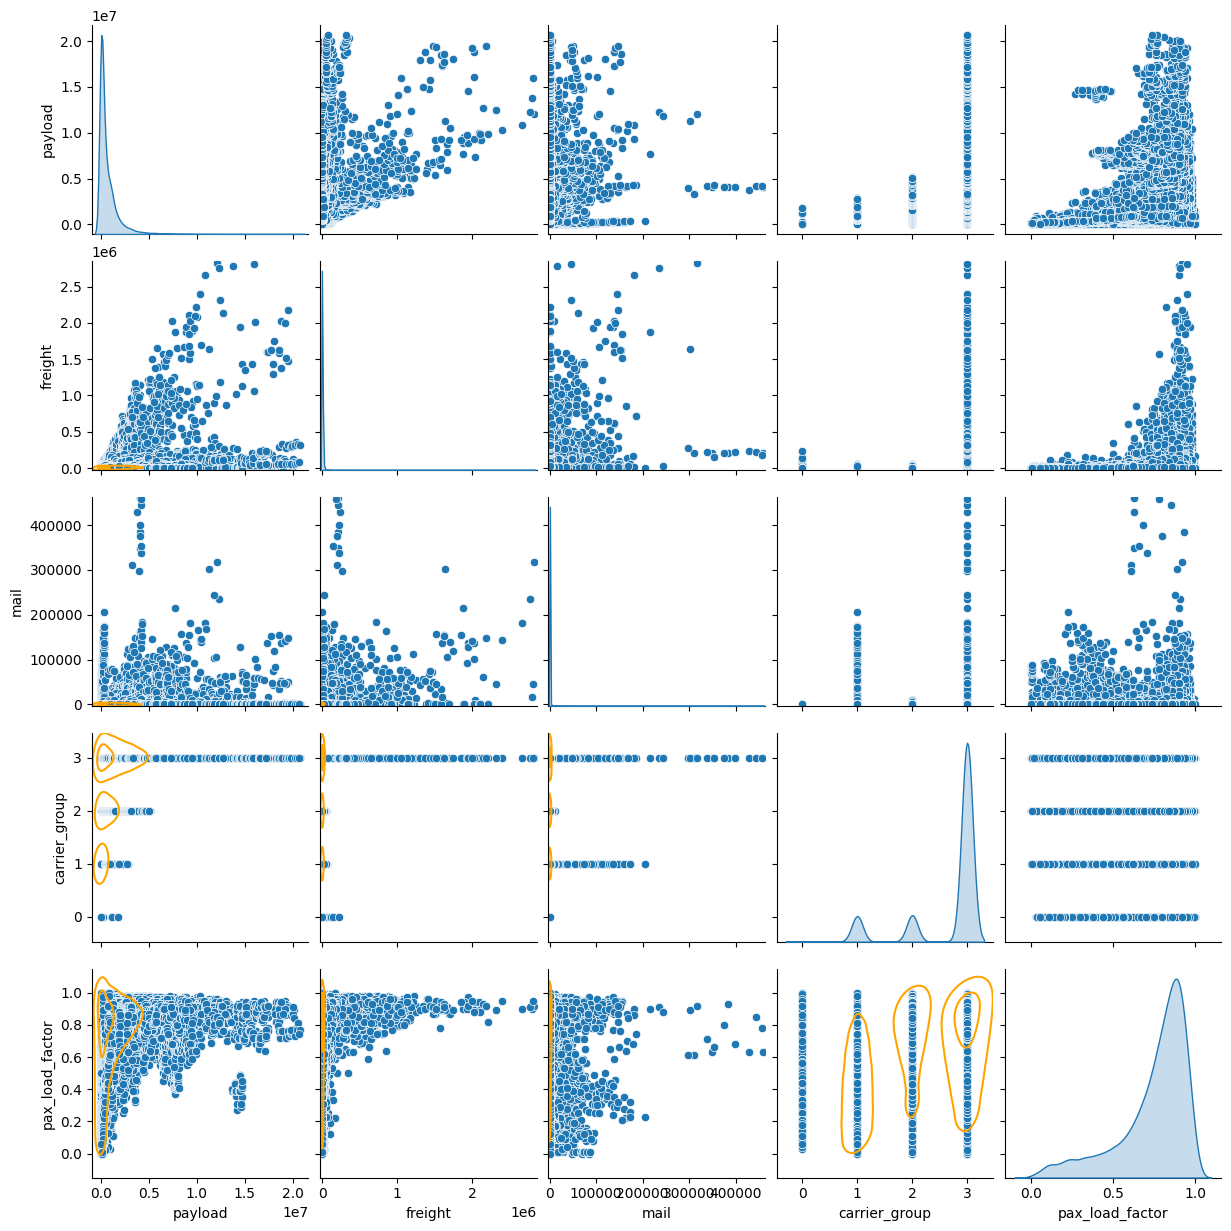

In [87]:
g = sns.pairplot(
    clean_data.drop(labels=["departures_performed", "distance", "air_time"], axis=1),
    diag_kind="kde",
    diag_kws={"bw_adjust": 2},
)
g.map_lower(sns.kdeplot, levels=3, color="orange", bw_adjust=2)

Distribution analysis by aircraft type (Kernel Density Estimation)

/Users/verena/DBU/Applied Data Science II/Prüfungsleistung/Passenger Forecast/.venv/lib/python3.13/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/verena/DBU/Applied Data Science II/Prüfungsleistung/Passenger Forecast/.venv/lib/python3.13/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/verena/DBU/Applied Data Science II/Prüfungsleistung/Passenger Forecast/.venv/lib/python3.13/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/verena/DBU/Applied Data Science II/Prüfungsleistung/Passenger Fore

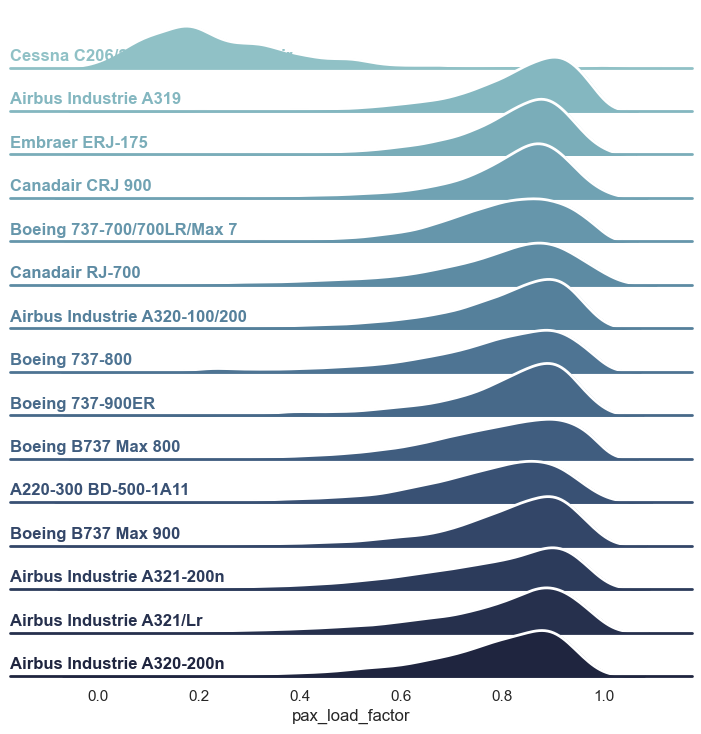

In [88]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Map aircraft_type and aircraft_name again
type_to_name = data[["aircraft_type", "aircraft_name"]].drop_duplicates()

# Merge for plotting
plot_data = clean_data.merge(type_to_name, on="aircraft_type", how="left")

# Initialize the FacetGrid object
aircraft = plot_data["aircraft_name"].value_counts().head(15).index
pal = sns.cubehelix_palette(len(aircraft), rot=-0.25, light=0.7)
g = sns.FacetGrid(plot_data[plot_data["aircraft_name"].isin(aircraft)], row="aircraft_name", hue="aircraft_name", aspect=15, height=0.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "pax_load_factor", bw_adjust=1.2, clip_on=False, fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "pax_load_factor", clip_on=False, color="w", lw=2, bw_adjust=1.2)


# Passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(
        0,
        0.2,
        label,
        fontweight="bold",
        color=color,
        ha="left",
        va="center",
        transform=ax.transAxes,
    )


g.map(label, "pax_load_factor")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-0.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

plt.show()

import warnings
warnings.filterwarnings(
    "ignore",
    message=".*tight_layout.*Axes height small enough.*",
    category=UserWarning
)


Distribution analysis by route (Kernel Density Estimation)

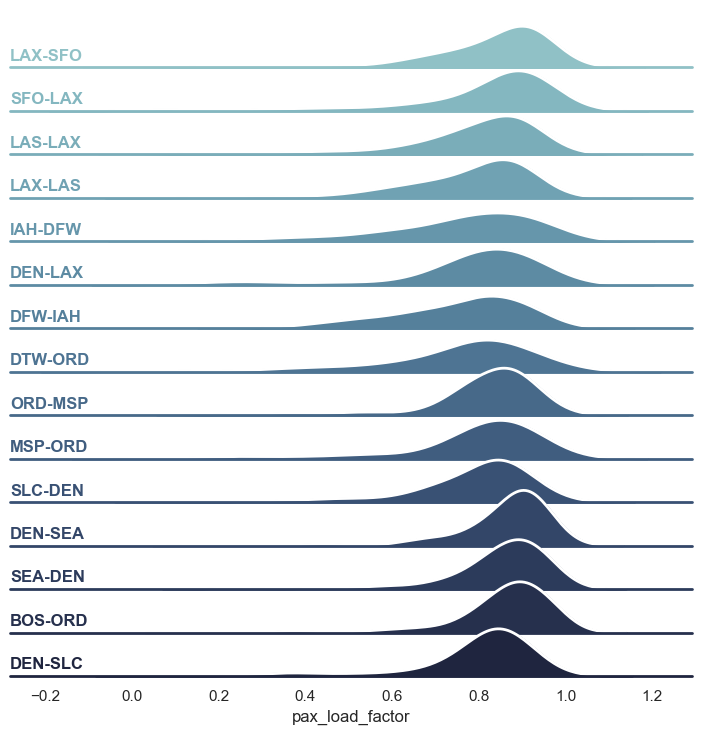

In [89]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Initialize the FacetGrid object
route = clean_data["route"].value_counts().head(15).index
pal = sns.cubehelix_palette(len(route), rot=-0.25, light=0.7)
g = sns.FacetGrid(plot_data[plot_data["route"].isin(route)], row="route", hue="route", aspect=15, height=0.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "pax_load_factor", bw_adjust=1.2, clip_on=False, fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "pax_load_factor", clip_on=False, color="w", lw=2, bw_adjust=1.2)


# Passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(
        0,
        0.2,
        label,
        fontweight="bold",
        color=color,
        ha="left",
        va="center",
        transform=ax.transAxes,
    )


g.map(label, "pax_load_factor")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-0.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

plt.show()

import warnings
warnings.filterwarnings(
    "ignore",
    message=".*tight_layout.*Axes height small enough.*",
    category=UserWarning
)

Distribution of aircraft types (Long-Tail Analysis)

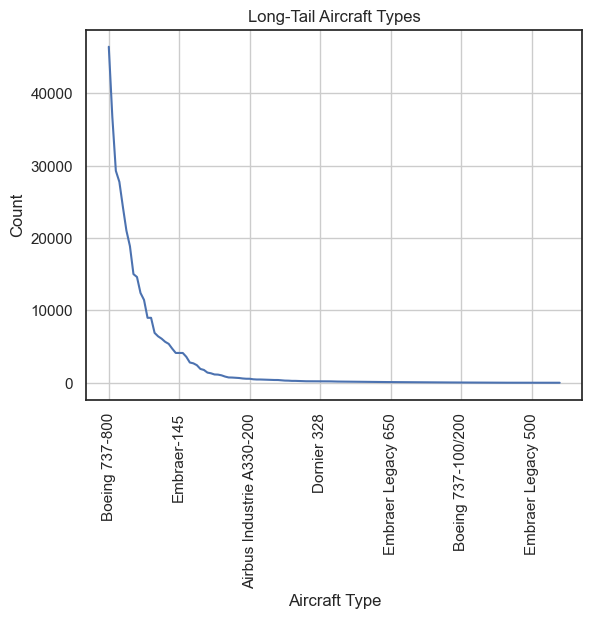

In [90]:
ax = plot_data["aircraft_name"].value_counts().plot(kind='line', title="Long-Tail Aircraft Types", xlabel="Aircraft Type", ylabel="Count")
ax.grid(True)
plt.xticks(rotation=90)
plt.show()

Distribution of routes (Long-Tail Analysis) - Top 30 routes

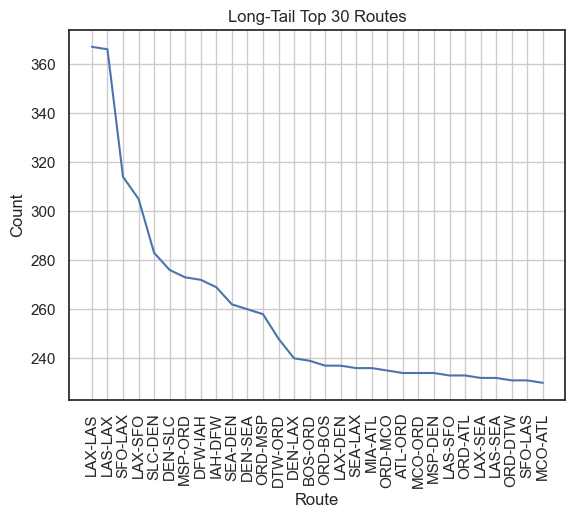

In [91]:
top_routes = clean_data["route"].value_counts().head(30)
ax = top_routes.plot(kind="line", title="Long-Tail Top 30 Routes", xlabel="Route", ylabel="Count")
ax.grid(True)
plt.xticks(ticks=range(len(top_routes)), labels=top_routes.index, rotation=90)
plt.show()

The cleaned dataset is exported for further preprocessing

In [92]:
# Export clean dataset
output_path = "../data/passenger_load_data.csv"
clean_data.to_csv(output_path, index=False)

print(f"Clean dataset exported successfully: {output_path}")

Clean dataset exported successfully: ../data/passenger_load_data.csv
